In [2]:
%matplotlib inline

# %matplotlib notebook

In [3]:
### Some necesary installs:

!pip install tensorflow_addons

### Point cloud installs:

!pip install opencv-python

!pip install pyntcloud

!pip install open3d

!pip install mlflow

In [4]:
### Usual imports:
import pandas as pd
import sympy
import math
import cmath
import numpy as np
import numpy.polynomial.polynomial as p
import matplotlib.pyplot as plt
import seaborn as sns
import re
import skimage.io
import time
import unittest
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy import stats

In [5]:
### Deep Learning imports:
import sys
import os
import tensorflow as tf

### Other imports:
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.metrics import *

import keras
from keras import models, layers, regularizers, metrics, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.applications.vgg19 import VGG19

import shutil
import random
import mlflow
import json
import joblib

In [6]:
### Point cloud imports:

# import cv2

In [7]:
### Verifying versions:

print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [8]:
tf.config.run_functions_eagerly(True)

In [9]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [10]:
### Setting up Google Drive to work with Google Colab

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
%cd /content/gdrive/MyDrive/Colab-Notebooks/softuni-ai-deeplearning-project-alz-1/
%ls -la

/content/gdrive/MyDrive/Colab-Notebooks/softuni-ai-deeplearning-project-alz-1
total 22015
drwx------ 4 root root    4096 Feb  7 09:22  data/
drwx------ 6 root root    4096 Feb  7 13:03  dataset/
drwx------ 2 root root    4096 Feb 13 12:50  dataset-4-aug-all/
drwx------ 2 root root    4096 Feb 15 10:03  dataset-4-aug-copy/
drwx------ 2 root root    4096 Feb  8 10:48 'dataset copy'/
drwx------ 2 root root    4096 Feb 13 08:05 'dataset copy 2'/
drwx------ 5 root root    4096 Feb 15 10:07  dataset-split/
drwx------ 2 root root    4096 Feb 15 17:25  history/
drwx------ 2 root root    4096 Feb 12 07:20  .ipynb_checkpoints/
drwx------ 3 root root    4096 Feb 15 14:23  logs/
drwx------ 5 root root    4096 Feb 15 14:17  mlruns/
drwx------ 5 root root    4096 Feb 15 14:42  models/
drwx------ 2 root root    4096 Feb 14 21:16  models-bkp-2022-02-14-2319/
drwx------ 2 root root    4096 Feb 15 18:00  pointcloud-experiment-notebooks/
drwx------ 2 root root    4096 Feb  7 09:19  resources/
drwx------ 

# Alzheimer's Disease Classification using Deep Learning

---
---
---

![header-image](https://storage.googleapis.com/kaggle-datasets-images/457093/861496/0e1367b46c9e96bdf3823ec7833b965d/dataset-cover.jpg)

<div style="text-align: center">Image referenced below.</div>

[[Reference]](#Alzheimer's-Dataset-(-4-class-of-Images)---Header-image)

---

## Introduction

***Author:*** Atanas Kuzmanov

***Date:*** 2022-February-20

*This is an article developed as a scientific notebook for an exam project assignment for a Deep Learning course from an Artificial Intelligence module.*

*One of the aims of this article is to understand and demonstrate some Deep Learning (DL) basics, more specifically to understand Neural Networks (NNs) and how to improve them, so we can create models, train them, test them and extract predictions, classifications and information we might be interested in.*

_We will demonstrate some of the following basic but key concepts of Deep Learning:_

- _Convolutional Neural Network_


- _Building a Neural Network architecture_


- _Compiling a model with optimizers and loss functions_


- _Training a model_


- _Evaluating a model_


- _Improving a model with Transfer Learning_


![1_kToStLowjokojIQ7pY2ynQ.jpeg](./resources/images/1_kToStLowjokojIQ7pY2ynQ.jpeg)

_Image source:_ https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

[[Reference]](#A-Comprehensive-Guide-to-Convolutional-Neural-Networks-—-the-ELI5-way)

_Deep Learning has a phenomenal range of application in the health sciences._


_This notebook implements a neural network model to predict the status (non-demented, moderate demented, very mild demented, mild demented) associated to the brain captured in MRI images._


![brain1.jpg](./resources/images/brain1.jpeg)

_Schematics of a healthy brain (left) and an Alzheimer affected brain (right)._

Image source: https://en.wikipedia.org/wiki/Alzheimer%27s_disease#/media/File:Alzheimer's_disease_brain_comparison.jpg

[[Reference]](#Alzheimer's-disease---Wikipedia)

![mri-scan.jpg](./resources/images/mri-scan.jpeg)

An MRI device.

Image source: https://www.medicalnewstoday.com/articles/146309

[[Reference]](#What-to-know-about-MRI-scans)

---

## Abstract

_This notebook implements a neural network model to predict the status (non-demented, moderate demented, very mild demented, mild demented) associated to the brain captured in MRI images._


_One of my main ideas about this article is to use some ground work from other articles, to set up a standard base for an Alzhemier's Dataset, and after that try to expand and build on top of this with my innovative ideas._

_Some of my innovative ideas include:_

- _Instead of the standard way of loading an image data set with a generator and then passing the generator to a model's `fit()` function directly, I want to load the images and actually build a `Tensorflow` data set. The reasoning behind this is - what if you have a model, whose layers cannot or should not be changed for one reason or another. For example, this way you would not be able to add augmentation layers to the model, so if you need to do `image augmentations`, or any other data `pre-processing` for that matter, you would need to do them beforehand, applied on the dataset itself. You can do image augmentations in the generators, however there could be something else which I cannot think of on the spot, which might require pre-processing on the dataset._


- _Turn the medical 2D images in 3D images, for example using `point clouds` and then using the new 3D images to train the model. A 3D view of a disease in the brain such as Alzheimer's Disease might give additional insights to the model which it has been previously missing._


- _Again using 2D image to 3D image conversion to get `depth estimation` images of a disease in the brain such as Alzheimer's Disease, and then use the new images to train the model. This might give additional insights to the model which it has been previously missing._


- _Once you have the 3D images build a new model using a `3D Convolutional Neural Network`._


- _Once all the previous ideas are implemented, the next one is to build a pipeline which can consist of several Neural Networks, `2D CNNs` and `3D CNNs`, and others, and have an `ensemble of Neural Networks`, which can be trained on different medical topics, such as Alzheimer's disease, lung diseases, retina diseases, and then be used to generalize and classify diseases._ _This last idea is inspired from this paper - MULTI-DISEASE DETECTION IN RETINAL IMAGING BASED ON ENSEMBLING HETEROGENEOUS DEEP LEARNING MODELS [[Reference]](#MULTI-DISEASE-DETECTION-IN-RETINAL-IMAGING-PDF)._

*This article is an exploration and extension inspired by the following articles:*

**Main inspiration articles:**

- mri_image_classification_using_transfer_learning [[Reference]](#mri_image_classification_using_transfer_learning)

- Alzheimer's-Disease-Classification---InceptionV3 [[Reference]](#Alzheimer's-Disease-Classification---InceptionV3)

- Alzheimer-MRI-Model-+-TensorFlow-2.3-Data-Loading [[Reference]](#Alzheimer-MRI-Model-+-TensorFlow-2.3-Data-Loading)

- TensorFlow-Pneumonia-Classification-on-X-rays [[Reference]](#TensorFlow-Pneumonia-Classification-on-X-rays)

- CNN-Alzheimer-MRI-images [[Reference]](#CNN-Alzheimer-MRI-images)

**Data:**

- Alzheimer's-Dataset-(-4-class-of-Images) [[Reference]](#Alzheimer's-Dataset-(-4-class-of-Images))

**Other inspiration articles:**

- The-Alzheimer's-Disease-Prediction-Of-Longitudinal-Evolution-(TADPOLE)-Challenge:-Results-after-1-Year-Follow-up [[Reference]](#The-Alzheimer's-Disease-Prediction-Of-Longitudinal-Evolution-(TADPOLE)-Challenge:-Results-after-1-Year-Follow-up---arxiv.org)

- Preclinical-Stage-Alzheimer’s-Disease-Detection-Using-MRI-Scans [[Reference]](#Preclinical-Stage-Alzheimer’s-Disease-Detection-Using-MRI-Scans)

- OASIS-Brains-project [[Reference]](#OASIS-Brains-project)

- Deep-Learning-in-Alzheimer's-disease:-Diagnostic-Classification-and-Prognostic-Prediction-using-Neuroimaging-Data [[Reference]](#Deep-Learning-in-Alzheimer's-disease:-Diagnostic-Classification-and-Prognostic-Prediction-using-Neuroimaging-Data)

- Automatic-Assessment-of-Alzheimer's-Disease-Diagnosis-Based-on-Deep-Learning-Techniques [[Reference]](#Automatic-Assessment-of-Alzheimer's-Disease-Diagnosis-Based-on-Deep-Learning-Techniques)

- An-explainable-two-dimensional-single-model-deep-learning-approach-for-Alzheimer's-disease-diagnosis-and-brain-atrophy-localization [[References]](#An-explainable-two-dimensional-single-model-deep-learning-approach-for-Alzheimer's-disease-diagnosis-and-brain-atrophy-localization)

- Convolutional-Neural-Networks-for-Classification-of-Alzheimer's-Disease:-Overview-and-Reproducible-Evaluation [[References]](#Convolutional-Neural-Networks-for-Classification-of-Alzheimer's-Disease:-Overview-and-Reproducible-Evaluation)

- Improving-3D-convolutional-neural-network-comprehensibility-via-interactive-visualization-of-relevance-maps:-Evaluation-in-Alzheimer's-disease [[Reference]](#Improving-3D-convolutional-neural-network-comprehensibility-via-interactive-visualization-of-relevance-maps:-Evaluation-in-Alzheimer's-disease)

- Diagnosis-of-Alzheimer's-Disease-via-Multi-modality-3D-Convolutional-Neural-Network [[Reference]](#Diagnosis-of-Alzheimer's-Disease-via-Multi-modality-3D-Convolutional-Neural-Network)

- Detection-of-Alzheimers-Disease-from-MRI-using-Convolutional-Neural-Networks,-Exploring-Transfer-Learning-And-BellCNN [[Reference]](#Detection-of-Alzheimers-Disease-from-MRI-using-Convolutional-Neural-Networks,-Exploring-Transfer-Learning-And-BellCNN)

- Detecting-Alzheimer's-Disease-Using-Gated-Convolutional-Neural-Network-from-Audio-Data [[Reference]](#Detecting-Alzheimer's-Disease-Using-Gated-Convolutional-Neural-Network-from-Audio-Data)

- Deep-Convolutional-Neural-Network-based-Classification-of-Alzheimer's-Disease-using-MRI-data [[Reference]](#Deep-Convolutional-Neural-Network-based-Classification-of-Alzheimer's-Disease-using-MRI-data)


**Another huge inspiration has been the following paper:**

MULTI-DISEASE DETECTION IN RETINAL IMAGING

BASED ON ENSEMBLING HETEROGENEOUS DEEP LEARNING MODELS

*Dominik Müller1, Iñaki Soto-Rey1,2 and Frank Kramer1*

1 IT-Infrastructure for Translational Medical Research, University of
Augsburg, Germany

2 Medical Data Integration Center, University Hospital Augsburg, Germany

Published: `[v1] Fri, 26 Mar 2021 18:02:17 UTC (757 KB)`

`References:`


Paper:

- MULTI-DISEASE DETECTION IN RETINAL IMAGING BASED ON ENSEMBLING HETEROGENEOUS DEEP LEARNING MODELS
[[Reference]](#MULTI-DISEASE-DETECTION-IN-RETINAL-IMAGING-PDF)

- Multi-Disease Detection in Retinal Imaging - papers with code
[[Reference]](#Multi-Disease-Detection-in-Retinal-Imaging---papers-with-code)

Code:

- Multi-Disease Detection in Retinal Imaging - GitHub
[[Reference]](#Multi-Disease-Detection-in-Retinal-Imaging---GitHub)

- AUCMEDI - A Framework for Automated Classification of Medical Images
[[Reference]](#AUCMEDI---A-Framework-for-Automated-Classification-of-Medical-Images)

Data:

- RETINAL FUNDUS MULTI-DISEASE IMAGE DATASET (RFMID)
[[Reference]](#RETINAL-FUNDUS-MULTI-DISEASE-IMAGE-DATASET-(RFMID))

- RFMiD Train Dataset - kaggle
[[Reference]](#RFMiD-Train-Dataset---kaggle)

Other:

- Retinal Image Analysis for multi-Disease Detection Challenge website
[[Reference]](#Retinal-Image-Analysis-for-multi-Disease-Detection-Challenge-website)

- IEEE ISBI 2021 International Symposium on Biomedical Imaging April 13-16 2021
[[Reference]](#IEEE-ISBI-2021-International-Symposium-on-Biomedical-Imaging-April-13-16-2021)

---

## Setup and Running this Notebook

_This is a Jupyter Notebook developed and meant to be run in `Google Colab` [[Reference]](#Google-Colab)._

_It is quite feature packed and it might take a bit longer to load, depending on the machine on which you are running it on. Please allow sufficient time for all of it to run all the way, until the last LaTeX formula, Markdown, Python, graphs, plots, images, etc. have loaded and executed. This also valid if you use `Kernel -> Restart & Run All`, however in this case this is not meant to be used for this notebook, as some of the cells are Deep Learning model experiments which run for hours, and also running them again will lose some of the results from the experiments._

_If you would like to try and run the notebook in an idempotent way I suggest that you comment out the lines of code which fit any models, and only use the lines of code which load pre-trained saved models and saved history._

### Requirements

- Tensorflow 2.7.0
- Keras 2.7.0

### Google Drive

_Because this notebook is developed as a scientific notebook for an exam project assignment for a Deep Learning course from an Artificial Intelligence module, in order to be assessed you will need to access and download the contents of this shared `Google Drive` folder in order to be able to run it:_

___Note: The contents of this folder are around 3GB.___

[Google Drive Project Shared folder - softuni-ai-deeplearning-project-alz-1](https://drive.google.com/drive/folders/1XkOpL7N6T2WtDKNacesf77o-m9Aw4AUs?usp=sharing)

https://drive.google.com/drive/folders/1XkOpL7N6T2WtDKNacesf77o-m9Aw4AUs?usp=sharing

_The contents should look like this or similar:_

```
.ipynb_checkpoints/                         --> MacOS folder for Jupyter Notebook checkpoints for this notebook
data/                                       --> Original dataset
dataset/                                    --> Modified dataset for relevant function in notebook
dataset copy/                               --> Copy of modified dataset for relevant function in notebook
dataset-4-aug/                              --> Copy of modified dataset for relevant function in notebook
dataset-4-aug-all/                          --> Copy of modified dataset for relevant function in notebook
dataset-4-aug-copy/                         --> Copy of modified dataset for relevant function in notebook
dataset-split/                              --> Copy of modified dataset for relevant function in notebook
history/                                    --> Saved history of training models
logs/                                       --> Tensorboard logs and files
mlruns/                                     --> mlflow files
models/                                     --> Saved models and model related files
pointcloud-experiment-notebooks/            --> Other draft work notebooks used for this notebook
resources/                                  --> Images and other resources
screenshots/                                --> Screenshots
softuni-ai-dl-project-2022-notebooks-bkps/  --> Backup copies of previous versions of this notebook
softuni-ai-dl-project-2022-Final-Version.ipynb --> The final version of this project notebook
```


## Disclaimer

_My experience in trying to develop, debug, train, fit, test etc. models in Google Colab has been not good and less than efficient. I do not mean to say that Google Colab is not good or efficient, it might as well be me doing something wrong or using it in the wrong way._

_As a result I have not had sufficient computing power at my disposal for proper hyperparameters._

_If I did, I could have used a good `batch number` and calculations such as the ones below to get good numbers for how many `steps` should we perform for training and validation per each of our `epochs` according to the `batches` of our dataset would have been suitable to get good or even state of the art results._

_As proof of this, please refer to the `screenshots/` directory, mentioned in the previous section and check out my pains, struggles and frustrations with running anything in Google Colab._

_Things to look out for in the screenshots:_


- _Check out the computer clock and see what time it is in between screenshots (the screenshots are also automatically timestamped) of executing one cell and se **how ridiculously long** it takes for it to execute. And I mean this for normal cells which either process a batch from the dataset or try to train a model, not some cell which is executing something obscure which ends up in an infinite loop or crashes Google Colab._


- _Check out how often Google Colab has crashed on me for no particular reason._


- _Check out how often the Google Colab session has been taken away from me, before I could save my model or before it has reached a checkpoint so it would save itself._

- _Check out how often the Google Colab has become unresponsive for long periods of times, sometimes hours, until I have had to manually interrupt my session, lose everything in my session as a result and have to start over._

- _The GPU allocation would be removed as a capability after about an hour worth of working in Google Colab._

- _Google Drive and Google Colab synchronization problems._

- _... etc._


_Because of the above, I have lost more than half of my time for this project in struggling with Google Colab issues, rather than actually working and developing the project._

---

## Notes

### Foreword

_One of the aims of this article is to understand some Deep Learning (DL) basics, basic concepts and intuitions._

_Because of that goal it is important to be able to train and test models multiple times, so we can determine the best hyperparameters and tune models to improve them. Unfortunately at the time of writing this article, in the year 2022, I am using my personal laptop from 2015. I thought this machine has fared rather well for it's age, and have great respect for it and what I have put it through, as we have been together through thick and thin. That was until I had to actually do DL on it for this article when I realized it is not going to fare well for this purpose. Most of the models were unable to run or finish running once I tried to train them, or once I tried to change the hyperparameters to improve them. My machine would just heat up with fans running at the highest rpms and still seem stuck on executing a cell for more than 30min. If I had carried on like this I would not have been able to finish this article, so instead most or all of the hyperparameters for the models are set to severely low or high, depending on the context, in order to reduce iterations or features of the data, so that this notebook would work and I would be able to demonstrate or give an example of the idea I am trying to explain. Please keep this in mind when going through the article._

_This will be sufficient for the purpose of this article, just to demonstrate and help understand DL basics, basic concepts and intuitions, but if you need to try out some of the examples and extend and improve them for actual Deep Learning keep in mind you need a powerful machine with a good GPU, or you can use a cloud platform suitable for DL, such as Google Colab._

### References Notes

_Any and all references, citations, resources or other materials used to understand and explain, provide examples, and build this article have been referenced in order to give credit where credit is due and avoid plagiarism._
_If a citation is the bigger part of a section, and has been edited, added to, modified, etc. the reference to that section would be at the end of it, separated with a horizontal line, like this example:_

> ---
> [[Example Reference]](#ExampleReference)

_If a citation has been inserted and is relatively short, the relevant reference will be at the end of the sentence or paragraph, for example:_

> Example. [[Example Reference]](#ExampleReference)

_In case a reference is missed due to human error, all references can be found in the [References](#References) section. Anything which is found in the [References](#References) should be considered as a valid reference for everything in this paper, even if not explicitly referenced._

### Narrative

_I have tried to provide a nice flow, ease of read and a friendly and humorous tone of the article, and at the same time clear and understandable communication. In order to aid this I have provided a narrative to this article. In order to distinguish it I have used italics for it throughout the article. Please consider any text in italics, such as the one you are currently reading, as narrative. It can also be both in bold and italics._

> _Example narrative._

### Code

_Currently most of the code in the article has been refactored into separate functions and most of the other code in the article is left fragmented throughout. There is a very good reason for this, which is that one of the aims of this article is to also understand a bit of Deep Learning. This is why the fragments of code throughout this article are used to help us and illustrate and demonstrate different parts of ML as a whole._

_Some of the code quality has been improved by making some functions idempotent with special checks, so that they have the same effect, no matter how many times they are ran._

_Most of the commented out code in this article is left on purpose to serve as information, as part of the intent for this article is for it to be a knowledgebase._

### Table of Contents (TOC)

_Please refer to the [Table of Contents](#Table-of-Contents) section in [Appendix A](#Appendix-A) for instructions on how you can use get a Table of Contents for this article in Jupyter Notebook._

### Testing

#### Project tests

- _Any mathematics in the project for which I have had doubts or have not understood I have tested using Wolfram Alpha._

- _I have repeatedly ran "Kernel -> Restart & Run All" to confirm all is working and have fixed bugs when things have been broken._

#### Code tests

- _There are code test, however the focus of this notebook is not on code tests. Due to the nature of this notebook, being focused on ML, most of the tests of this note book are actually metrics, scoring, score analysis, model testing and cross-validation._

- _There are tests in the project. Since code tests are outside of the focus of this project most of the tests are visual print outs of the data and visual confirmations._

- _Most of the tests in this project are visual and are marked with this "`### Test`" comment above it._

- _There are also tests which are more functional and for example print a message if an assertion error is not thrown._

_I consider this amount of test coverage adequate for the purpose of this article._

---

### Hypothesis<a id="Hypothesis"></a>

#### Null hypothesis $(H_{0})$<a id="NullHypothesis"></a>

*The Null hypothesis $(H_{0})$ tells us that the status quo is real, that nothing interesting happens.*

*This is the hypothesis we are going to try and disprove, by demonstrating that an Alternative hypothesis $(H_{1})$ is true with experiments.*

#### Alternative hypothesis $(H_{1})$<a id="AlternativeHypothesis"></a>

*The Alternative hypothesis $(H_{1})$ is what we are trying to demonstrate.*

_**For the purpose of this article/notebook we will state the following topic, with it's Null and Alternative hypothesis.**_

#### Topic: Alzheimer's Disease Classification using Deep Learning

##### Null hypothesis 1 $(H_{0})$<a id="NullHypothesis1"></a>

- Null hypothesis 1 $(H_{0})$:

    **Deep Learning and Convolutional Neural Networks are not suitable for Alzheimer's disease classification, as they do not achieve a state of the art AUROC of 0.93 or above.**

##### Alternative hypothesis 1 $(H_{1})$<a id="AlternativeHypothesis1"></a>

- Alternative hypothesis 2 $(H_{1})$:

    **Deep Learning and Convolutional Neural Networks are suitable for Alzheimer's disease classification, as they do achieve a state of the art AUROC of 0.93 or above.**

---

## Research

- The-Alzheimer's-Disease-Prediction-Of-Longitudinal-Evolution-(TADPOLE)-Challenge:-Results-after-1-Year-Follow-up [[Reference]](#The-Alzheimer's-Disease-Prediction-Of-Longitudinal-Evolution-(TADPOLE)-Challenge:-Results-after-1-Year-Follow-up---arxiv.org)

- Preclinical-Stage-Alzheimer’s-Disease-Detection-Using-MRI-Scans [[Reference]](#Preclinical-Stage-Alzheimer’s-Disease-Detection-Using-MRI-Scans)

- OASIS-Brains-project [[Reference]](#OASIS-Brains-project)

- Deep-Learning-in-Alzheimer's-disease:-Diagnostic-Classification-and-Prognostic-Prediction-using-Neuroimaging-Data [[Reference]](#Deep-Learning-in-Alzheimer's-disease:-Diagnostic-Classification-and-Prognostic-Prediction-using-Neuroimaging-Data)

- Automatic-Assessment-of-Alzheimer's-Disease-Diagnosis-Based-on-Deep-Learning-Techniques [[Reference]](#Automatic-Assessment-of-Alzheimer's-Disease-Diagnosis-Based-on-Deep-Learning-Techniques)

- An-explainable-two-dimensional-single-model-deep-learning-approach-for-Alzheimer's-disease-diagnosis-and-brain-atrophy-localization [[References]](#An-explainable-two-dimensional-single-model-deep-learning-approach-for-Alzheimer's-disease-diagnosis-and-brain-atrophy-localization)

- Convolutional-Neural-Networks-for-Classification-of-Alzheimer's-Disease:-Overview-and-Reproducible-Evaluation [[References]](#Convolutional-Neural-Networks-for-Classification-of-Alzheimer's-Disease:-Overview-and-Reproducible-Evaluation)

- Improving-3D-convolutional-neural-network-comprehensibility-via-interactive-visualization-of-relevance-maps:-Evaluation-in-Alzheimer's-disease [[Reference]](#Improving-3D-convolutional-neural-network-comprehensibility-via-interactive-visualization-of-relevance-maps:-Evaluation-in-Alzheimer's-disease)

- Diagnosis-of-Alzheimer's-Disease-via-Multi-modality-3D-Convolutional-Neural-Network [[Reference]](#Diagnosis-of-Alzheimer's-Disease-via-Multi-modality-3D-Convolutional-Neural-Network)

- Detection-of-Alzheimers-Disease-from-MRI-using-Convolutional-Neural-Networks,-Exploring-Transfer-Learning-And-BellCNN [[Reference]](#Detection-of-Alzheimers-Disease-from-MRI-using-Convolutional-Neural-Networks,-Exploring-Transfer-Learning-And-BellCNN)

- Detecting-Alzheimer's-Disease-Using-Gated-Convolutional-Neural-Network-from-Audio-Data [[Reference]](#Detecting-Alzheimer's-Disease-Using-Gated-Convolutional-Neural-Network-from-Audio-Data)

- Deep-Convolutional-Neural-Network-based-Classification-of-Alzheimer's-Disease-using-MRI-data [[Reference]](#Deep-Convolutional-Neural-Network-based-Classification-of-Alzheimer's-Disease-using-MRI-data)


---

## Data

_The data:_

_Here is a data set from [[kaggle.com]](#kaggle.com)_

- Alzheimer's-Dataset-(-4-class-of-Images) [[Reference]](#Alzheimer's-Dataset-(-4-class-of-Images))


---

## Predicting Alzheimer's disease with Deep Learning

_In this section we will build a complete pipeline to build a model that can predict the dementia level of an Alzheimer's patient from their MRI image._

_The work in the following section is inspired and heavily based on the following articles._
_They are used for groundwork for setting up, and for demonstrating some of the Deep Learning concepts outlined in this article._

- mri_image_classification_using_transfer_learning [[Reference]](#mri_image_classification_using_transfer_learning)

- Alzheimer's-Disease-Classification---InceptionV3 [[Reference]](#Alzheimer's-Disease-Classification---InceptionV3)

- Alzheimer-MRI-Model-+-TensorFlow-2.3-Data-Loading [[Reference]](#Alzheimer-MRI-Model-+-TensorFlow-2.3-Data-Loading)

## Setup

_It's always a good idea to set constant variables instead of hard coding numbers into your code. It saves time later when you want to change certain parameters._

In [11]:
root_dir = "./"
dg_dir = "/content/gdrive/MyDrive/Colab-Notebooks/softuni-ai-deeplearning-project-alz-1/"
base_dir = "/content/gdrive/MyDrive/Colab-Notebooks/softuni-ai-deeplearning-project-alz-1/data/"
test_dir = base_dir + "test/"
train_dir = base_dir + "train/"
work_dir = root_dir + "dataset/"
WORK_DIR = work_dir

In [12]:
### The code below is to be used only if you are building the dataset from scratch for the first time:

# if os.path.exists(work_dir):
#     remove_tree(work_dir)
    

# os.mkdir(work_dir)
# copy_tree(train_dir, work_dir)
# copy_tree(test_dir, work_dir)
# print("Working Directory Contents:", os.listdir(work_dir))

In [13]:
CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

NUM_CLASSES = len(CLASSES)

IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)

EPOCHS = 4

BATCH_SIZE = 32 * strategy.num_replicas_in_sync

AUTO = tf.data.AUTOTUNE

_Use the below to clear the session and reset models:_

In [14]:
### Use the below to clear the session and reset models:

# tf.keras.backend.clear_session

---

_Initially I was planning to read the data like this and have only two data sets - train and validation one._



In [15]:
# diy_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     base_dir+"train",
#     validation_split=0.2,
#     subset="training",
#     seed=1337,
#     image_size=IMAGE_SIZE,
#     color_mode="rgb"
# )

# diy_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     base_dir+"train",
#     validation_split=0.2,
#     subset="validation",
#     seed=1337,
#     image_size=IMAGE_SIZE,
#     color_mode="rgb"
# )

In [16]:
# print(type(train_ds))

_I was thinking I would like to have a `test` dataset as well, so I went on to see what I can do._

---

_I also wanted to do image augmentations to have more data samples._

_I know I can add an augmentation layer to the model, but I wanted to explore a way where the augmentation is done on the data set._

_This is for the scenario where you have a pre-trained model which you cannot change for one reason or the other, and you still want to do some custom image augmentations._

_So, for this goal we will be using an image generator below._

In [17]:
#Performing Image Augmentation to have more data samples

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

image_gen = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

---

_I decided to use `image_gen.flow_from_directory`._

In [18]:
train_data_gen = image_gen.flow_from_directory(directory=WORK_DIR, 
                                               target_size=DIM, 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True, 
                                               seed=9)

print(type(image_gen))

Found 6400 images belonging to 4 classes.
<class 'keras.preprocessing.image.ImageDataGenerator'>


_Then I was planning on having two separate image generators, however that took forever and caused me sync problems with GoogleDrive._

In [19]:
# train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
# train_dataset

In [20]:
# test_data, test_labels = test_data_generator.next()

In [21]:
# test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
# test_dataset

_So I decided to go with just one image generator._

In [22]:
train_data, train_labels = train_data_gen.next()

_If you get the following or similar error, use `Restart runtime` in Google Colab, it seems to be a bug judging from this issue [Detectron2 on Google colab error : 'PIL.TiffTags' has no attribute 'IFD' #2231](https://github.com/facebookresearch/detectron2/issues/2231)._

Error:

```
'PIL.TiffTags' has no attribute 'IFD'
```

_However, albeit not entierly elegant, I tried using `train_test_split`, as this way I would get train, validation and test data._

In [23]:
# Splitting the data into train, test, and validation sets:

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [24]:
print(">>> train_data.shape: ", train_data.shape)
print(">>> train_labels.shape: ", train_labels.shape)
print(">>> test_data.shape: ", test_data.shape)
print(">>> test_labels.shape: ", test_labels.shape)
print(">>> val_data.shape: ", val_data.shape)
print(">>> val_labels.shape: ", val_labels.shape)

print(train_data[0][0][0][0])
print(type(train_data[0][0][0][0]))

>>> train_data.shape:  (20, 176, 176, 3)
>>> train_labels.shape:  (20, 4)
>>> test_data.shape:  (7, 176, 176, 3)
>>> test_labels.shape:  (7, 4)
>>> val_data.shape:  (5, 176, 176, 3)
>>> val_labels.shape:  (5, 4)
0.0
<class 'numpy.float32'>


---

_I wanted to do oversampling, but the below code crashed my Google Colab session each time I tried to execute it._

In [25]:
# new_train_ds

# Performing over-sampling of the data, since the classes are imbalanced

# sm = SMOTE(random_state=42)

# train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

# train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# print(train_data.shape, train_labels.shape)

---

_Initially I tried building the dataset using `slices` but that did not work out well._

In [26]:
# Retrieving the data from the ImageDataGenerator iterator

# train_data, train_labels = train_data_gen.next()

In [27]:
# Getting to know the dimensions of our dataset

# print(train_data.shape, train_labels.shape)

In [28]:
# new_train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

In [29]:
# print(new_train_dataset)
# print(len(new_train_dataset))

In [30]:
# new_train_dataset = new_train_dataset.cache().prefetch(buffer_size=AUTO)

In [31]:
# print(new_train_dataset)
# print(len(new_train_dataset))

---

_I wanted to see what else can I use, other than `train_test_split`._

_I decided to use `image_gen.flow_from_directory`._

_Below we are building a dataset from the image generator._

In [32]:
### Building a dataset from the image generator:

tr_datset = tf.data.Dataset.from_generator(lambda: train_data_gen,
                                           output_types = (tf.float32, tf.float32),
                                            output_shapes = ([None, 176, 176, 3], [None, 4]))

tr_datset = tr_datset.apply(tf.data.experimental.assert_cardinality(6400)) # number of samples

print(tr_datset)
print(len(tr_datset))

<_AssertCardinalityDataset shapes: ((None, 176, 176, 3), (None, 4)), types: (tf.float32, tf.float32)>
6400


In [33]:
### Setting up repeat() for the dataset:

tr_datset_rep = tr_datset.repeat(EPOCHS)

In [34]:
# Reference: https://towardsdatascience.com/how-to-split-a-tensorflow-dataset-into-train-validation-and-test-sets-526c8dd29438

def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=9)

    # Use when BATCH_SIZE > 1:
    train_size = int(train_split * ds_size) // BATCH_SIZE
    val_size = int(val_split * ds_size) // BATCH_SIZE
    test_size = int(test_split * ds_size) // BATCH_SIZE

    # Use when BATCH_SIZE == 1:
    # train_size = int(train_split * ds_size)
    # val_size = int(val_split * ds_size)
    # test_size = int(test_split * ds_size)

    print(">>> train_size ", train_size)
    print(">>> val size ", val_size)
    print(">>> test size ", test_size)

    print("\n")

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size).take(test_size)

    print(">>> new_train_ds: ", train_ds)
    print(">>> new_val_ds: ", val_ds)
    print(">>> new_test_ds: ", test_ds)

    print("\n")

    print(">>> len new_train_ds: ", len(train_ds))
    print(">>> len new_val_ds: ",  len(val_ds))
    print(">>> len new_test_ds: ",  len(test_ds))
    
    return train_ds, val_ds, test_ds

In [35]:
new_train_ds, new_val_ds, new_test_ds = get_dataset_partitions_tf(tr_datset_rep, len(tr_datset_rep), shuffle=False, shuffle_size=len(tr_datset_rep))

>>> train_size  640
>>> val size  80
>>> test size  80


>>> new_train_ds:  <TakeDataset shapes: ((None, 176, 176, 3), (None, 4)), types: (tf.float32, tf.float32)>
>>> new_val_ds:  <TakeDataset shapes: ((None, 176, 176, 3), (None, 4)), types: (tf.float32, tf.float32)>
>>> new_test_ds:  <TakeDataset shapes: ((None, 176, 176, 3), (None, 4)), types: (tf.float32, tf.float32)>


>>> len new_train_ds:  640
>>> len new_val_ds:  80
>>> len new_test_ds:  80


In [36]:
# ### Repeat:

# num_epochs = 4

# new_train_ds_rep = new_train_ds.repeat(num_epochs)

# new_val_ds_rep = new_val_ds.repeat(num_epochs)

# new_test_ds_rep = new_test_ds.repeat(num_epochs)

# print(">>> new_train_ds_rep: ", new_train_ds_rep)
# print(">>> new_val_ds_rep: ", new_val_ds_rep)
# print(">>> new_test_ds_rep: ", new_test_ds_rep)

# print(">>> len new_train_ds_rep: ", len(new_train_ds_rep))
# print(">>> len new_val_ds_rep: ",  len(new_val_ds_rep))
# print(">>> len new_test_ds_rep: ",  len(new_test_ds_rep))

In [37]:
STEPS_PER_EPOCH = len(new_train_ds) // BATCH_SIZE
print(">>> STEPS_PER_EPOCH: ", STEPS_PER_EPOCH)

VAL_STEPS_PER_EPOCH = len(new_val_ds) // BATCH_SIZE
print(">>> VAL_STEPS_PER_EPOCH: ", VAL_STEPS_PER_EPOCH)

>>> STEPS_PER_EPOCH:  20
>>> VAL_STEPS_PER_EPOCH:  2


_Like mentioned in the introductory notes, we currently do not have sufficient computing power at our disposal for proper hyperparameters._

_If we did, we could use calculations such as the ones below to get good numbers for how many `steps` should we perform for `training` and `validation` per each of our `epochs` according to the `batches` of our `dataset`._

---

## Data visualization

_Visualizing a bit of our data, just to get an idea._

_Now that our data has been loaded in, the next step is to visualize our images. This helps us understand what is being used as an input for our model. It also serves as a check to see if our images have been loaded in correctly._

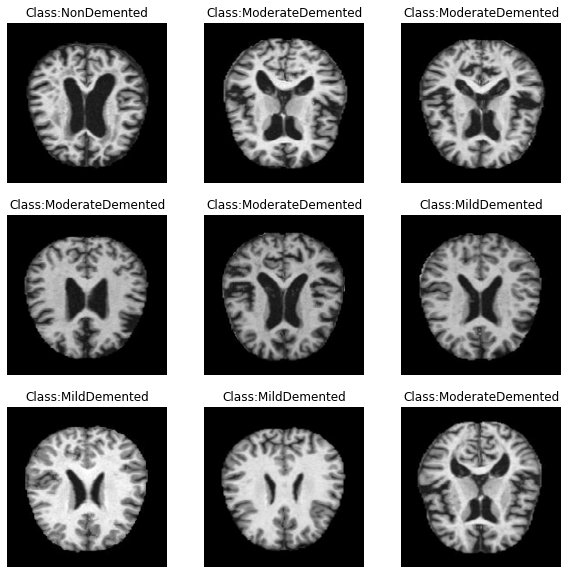

In [38]:
def show_images(generator,y_pred=None):
    """
    Input: An image generator,predicted labels (optional)
    Output: Displays a grid of 9 images with lables
    """
    
    # get image lables
    labels =dict(zip([0,1,2,3], CLASSES))
    
    # get a batch of images
    x,y = generator.next()
    
    # display a grid of 9 images
    plt.figure(figsize=(10, 10))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, BATCH_SIZE-1)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("Class:{}".format(labels[np.argmax(y[idx])]))
                                                     
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual:{} \nPredicted:{}".format(labels[np.argmax(y[i])],labels[y_pred[i]]))
    
# Display Train Images
show_images(train_data_gen)

---

## Inception v3

_We will be using the InceptionV3 model as a base model for the task._

_Let's create the base model from the pre-trained InceptionV3 architecture._

### Base Inception v3 model

In [39]:
# Create the base model from the pre-trained InceptionV3 architecture

base_inception_model = InceptionV3(input_shape=(176, 176, 3),
                              include_top=False, 
                              weights="imagenet")

_We need to freeze the base model layers to prevent its weights from being modified._

In [40]:
### Freezing base_model layers:
### This would also do: `base_inception_model.trainable = false`
for layer in base_inception_model.layers:
    layer.trainable=False

_Let's check the base model's architecture._

In [41]:
base_inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 176, 176, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 87, 87, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 87, 87, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

### Transfer learning and a custom Inception v3 model

_By using transfer learnign we will build our custom architecture on top of the base model._

_We will be using the `base model's` input shape, which we have previously specified, to fit our images._

_As a final output we will be using a `Dense` layer with output shape of `4` as we have `4` classes between which we need to classify, with an `activation` of `softmax`._

In [42]:
### custom_inception_model with global_average_layer

custom_inception_model = Sequential([
        base_inception_model,
        Dropout(0.5),
        GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(4, activation='softmax')        
    ], name = "inception_cnn_model")

_Let's check the base model's architecture._

In [43]:
custom_inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 4, 4, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 512)       

### Defining our callbacks

_Ideally we would be defining a custom callback function to stop training our model when accuracy goes above 99%, however due to the aforementioned difficulties and lack of power on my personal machine and on Google Colab, we would lower all of our metrics and hyperparameters._

In [44]:
# Defining a custom callback function to stop training our model when accuracy goes above a certain level.
# Ideally we would be defining a custom callback function to stop training our model when accuracy goes above 99%,
# but because we are doing this as a project with not a lot of computing power,
# let set it for when accuracy goes above 65%:

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.65:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
my_callback = MyCallback()

In [45]:
# Using ReduceLROnPlateau to stabilize the training process of the model
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=3)

In [46]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(root_dir+"models/model-inceptionv3-1/alzheimer_model-inceptionv3-1.h5",
                                                    save_best_only=True, 
                                                   monitor="val_loss", 
                                                   mode='min')

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True, 
                                                     monitor="val_loss", 
                                                     mode='min')

In [47]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
           tfa.metrics.F1Score(num_classes=4)]

In [48]:
CALLBACKS = [checkpoint_cb, early_stopping_cb, my_callback, rop_callback]

### Compiling our custom model

_It's time to compile our custom model._

In [49]:
custom_inception_model.compile(optimizer='rmsprop',
                               loss=tf.losses.CategoricalCrossentropy(),
                               metrics=METRICS)

_Let's check our compiled custom models' architecture._

In [50]:
custom_inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 4, 4, 2048)        0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 512)       

### Training our model

### Let's fit our model!

_It's time to fit our model with the training data and validate it using the validation data._

_Please keep in mind the cell below took about 1 hour to execute in Google Colab. And that is with a small number of epochs and steps per epoch._

In [51]:
# Fit the training data to the model and validate it using the validation data

history_inception_3 = custom_inception_model.fit(new_train_ds,
                                     validation_data=new_val_ds, 
                                     callbacks=CALLBACKS, 
                                     epochs=EPOCHS,
                                     steps_per_epoch=16,
                                     validation_steps=VAL_STEPS_PER_EPOCH)

Epoch 1/4
16/16 [==============================] - 1373s 90s/step - loss: 1.8613 - acc: 0.2656 - auc: 0.5019 - f1_score: 0.2159 - val_loss: 1.6527 - val_acc: 0.2969 - val_auc: 0.4863 - val_f1_score: 0.1621 - lr: 0.0010
Epoch 2/4
16/16 [==============================] - 418s 27s/step - loss: 1.7250 - acc: 0.3125 - auc: 0.5533 - f1_score: 0.2485 - val_loss: 1.3931 - val_acc: 0.3906 - val_auc: 0.6034 - val_f1_score: 0.2995 - lr: 0.0010
Epoch 3/4
16/16 [==============================] - 443s 29s/step - loss: 1.6658 - acc: 0.3184 - auc: 0.5633 - f1_score: 0.2350 - val_loss: 1.2092 - val_acc: 0.4844 - val_auc: 0.7359 - val_f1_score: 0.2609 - lr: 0.0010
Epoch 4/4
16/16 [==============================] - 413s 27s/step - loss: 1.4946 - acc: 0.3711 - auc: 0.6253 - f1_score: 0.2837 - val_loss: 1.0786 - val_acc: 0.5938 - val_auc: 0.8118 - val_f1_score: 0.3006 - lr: 0.0010


In [52]:
### Reference: https://stackoverflow.com/questions/49969006/save-and-load-keras-callbacks-history

# # Get the dictionary containing each metric and the loss for each epoch
# history_inception_3_dict = history_inception_3.history

# # Save it under the form of a json file
# json.dump(history_dict, open(your_history_path, 'w'))

# history_inception_3_dict = json.load(open(your_history_path, 'r'))

In [71]:
### Reference: https://stackoverflow.com/questions/64890298/nonetype-object-is-not-subscriptable-when-viewing-the-history

### Dump history:

joblib.dump(history_inception_3, root_dir+"history/alzheimer_inception_model_2022_02_12_1")

INFO:tensorflow:Assets written to: ram://33ff24d0-7401-4327-89b9-b668d18e087b/assets


['./history/alzheimer_inception_model_2022_02_12_1']

In [72]:
### Reference: https://stackoverflow.com/questions/64890298/nonetype-object-is-not-subscriptable-when-viewing-the-history

### Load history:

history_inception_3 = joblib.load(root_dir+"history/alzheimer_inception_model_2022_02_12_1")

___Well these results do not look as good as expected, the `loss` function is high, and the `accuracy` is low, and these should really be the other way around.___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training.___

___The `epoch` hyperparameter should really be much bigger, around `512` for example, and the `steps_per_epoch` should really be around `256` for example. Unfortunately we are limited by the `BATCH_SIZE` constant, as it is correlated to the `epoch` and `steps_per_epoch` hyperparameters and the way they are calculated. We have set the `BATCH_SIZE` constant to a low number, only due to the Google Colab limitations.___

### Saving our model

_Saving the model for future use._

In [73]:
# Saving the model for future use
def save_model(model_to_save, dir_name):
    model_save_dir = root_dir + dir_name
    model_to_save.save(model_save_dir, save_format='h5')
    os.listdir(work_dir)

In [75]:
save_model(custom_inception_model, "models/alzheimer_inception_model_2022_02_12_1")

### Visualize Model Metrics

_Let's plot the trend of the metrics during training._

In [76]:
# Plotting the trend of the metrics during training

def plot_history_metrics(history_to_plot):
    fig, ax = plt.subplots(1, 3, figsize = (30, 5))
    ax = ax.ravel()

    for i, metric in enumerate(["acc", "auc", "loss"]):
        ax[i].plot(history_to_plot.history[metric])
        ax[i].plot(history_to_plot.history["val_" + metric])
        ax[i].set_title("Model {}".format(metric))
        ax[i].set_xlabel("Epochs")
        ax[i].set_ylabel(metric)
        ax[i].legend(["train", "val"])

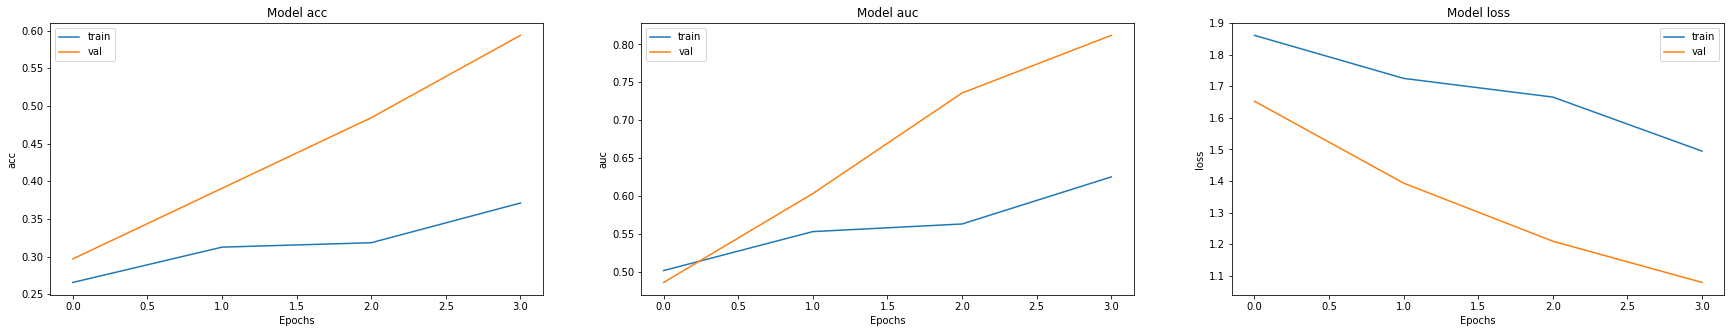

In [77]:
plot_history_metrics(history_inception_3)

___Well these results do not look as good as expected, the `auc roc curve` does not have a good "curve".___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training due to the reasons explained in the [Disclaimer](#Disclaimer) section.___

### Evaluate the model

_Give the cell below a bit of time, takes about 6 minutes in Google Colab._

In [78]:
# If you want to retrieve more elements of the dataset, just increase the number inside the take method.
# If you want all elements, just insert -1.

for test_images_split, test_labels_split in new_test_ds.take(-1):
    numpy_test_images = test_images_split.numpy()
    numpy_test_labels = test_labels_split.numpy()

_Let's evaluate our model on the test data._

In [79]:
# Evaluating the model on the data

test_scores = custom_inception_model.evaluate(numpy_test_images, numpy_test_labels)

print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))


1/1 [==============================] - 2s 2s/step - loss: 1.0823 - acc: 0.5625 - auc: 0.8192 - f1_score: 0.3958
Testing Accuracy: 56.25%


___Well these results do not look as good as expected, the `Accuracy` is very low.___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training due to the reasons explained in the [Disclaimer](#Disclaimer) section.___

_Let's do some predictions and print some classification reports._

_Give the cell below a bit of time, takes about 10 minutes in Google Colab._

In [80]:
# Predicting the test data

pred_labels = custom_inception_model.predict(numpy_test_images)

In [81]:
# Print the classification report of the tested data

# Since the labels are softmax arrays, we need to roundoff to have it in the form of 0s and 1s,
# similar to the test_labels
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)


In [82]:
print(classification_report(numpy_test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

     NonDemented       0.50      0.50      0.50         2
VeryMildDemented       0.00      0.00      0.00         0
    MildDemented       0.71      0.63      0.67        19
ModerateDemented       0.38      0.45      0.42        11

       micro avg       0.56      0.56      0.56        32
       macro avg       0.40      0.40      0.40        32
    weighted avg       0.58      0.56      0.57        32
     samples avg       0.56      0.56      0.56        32



In [83]:
numpy_test_labels.shape

(32, 4)

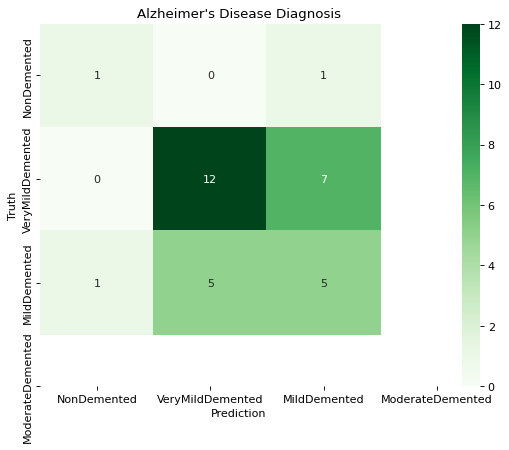

In [84]:
# Plot the confusion matrix to understand the classification in detail

def plot_confusion_matrix(pred_labels, test_labels):
  pred_ls = np.argmax(pred_labels, axis=1)
  test_ls = np.argmax(test_labels, axis=1)

  conf_arr = confusion_matrix(test_ls, pred_ls)

  plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

  ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES,
                  yticklabels=CLASSES)

  plt.title('Alzheimer\'s Disease Diagnosis')
  plt.xlabel('Prediction')
  plt.ylabel('Truth')
  plt.show(ax)

plot_confusion_matrix(pred_labels, numpy_test_labels)

In [85]:
# Printing some other classification metrics

pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(numpy_test_labels, axis=1)

print("Balanced Accuracy Score: {} %".format(round(BAS(test_ls, pred_ls) * 100, 2)))
print("Matthew's Correlation Coefficient: {} %".format(round(MCC(test_ls, pred_ls) * 100, 2)))

Balanced Accuracy Score: 52.87 %
Matthew's Correlation Coefficient: 19.28 %


___Well these results do not look as good as expected, the `Confusion Matrix` is even missing some of it's dimensions.___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training due to the reasons explained in the [Disclaimer](#Disclaimer) section.___

### Loading the saved model

_Let's load our model and print it's architecture, so we can have a better visual representation of it._

In [86]:
pretrained_model = tf.keras.models.load_model(root_dir+"models/alzheimer_inception_model_2022_02_12_1")

### Plotting the model architecture

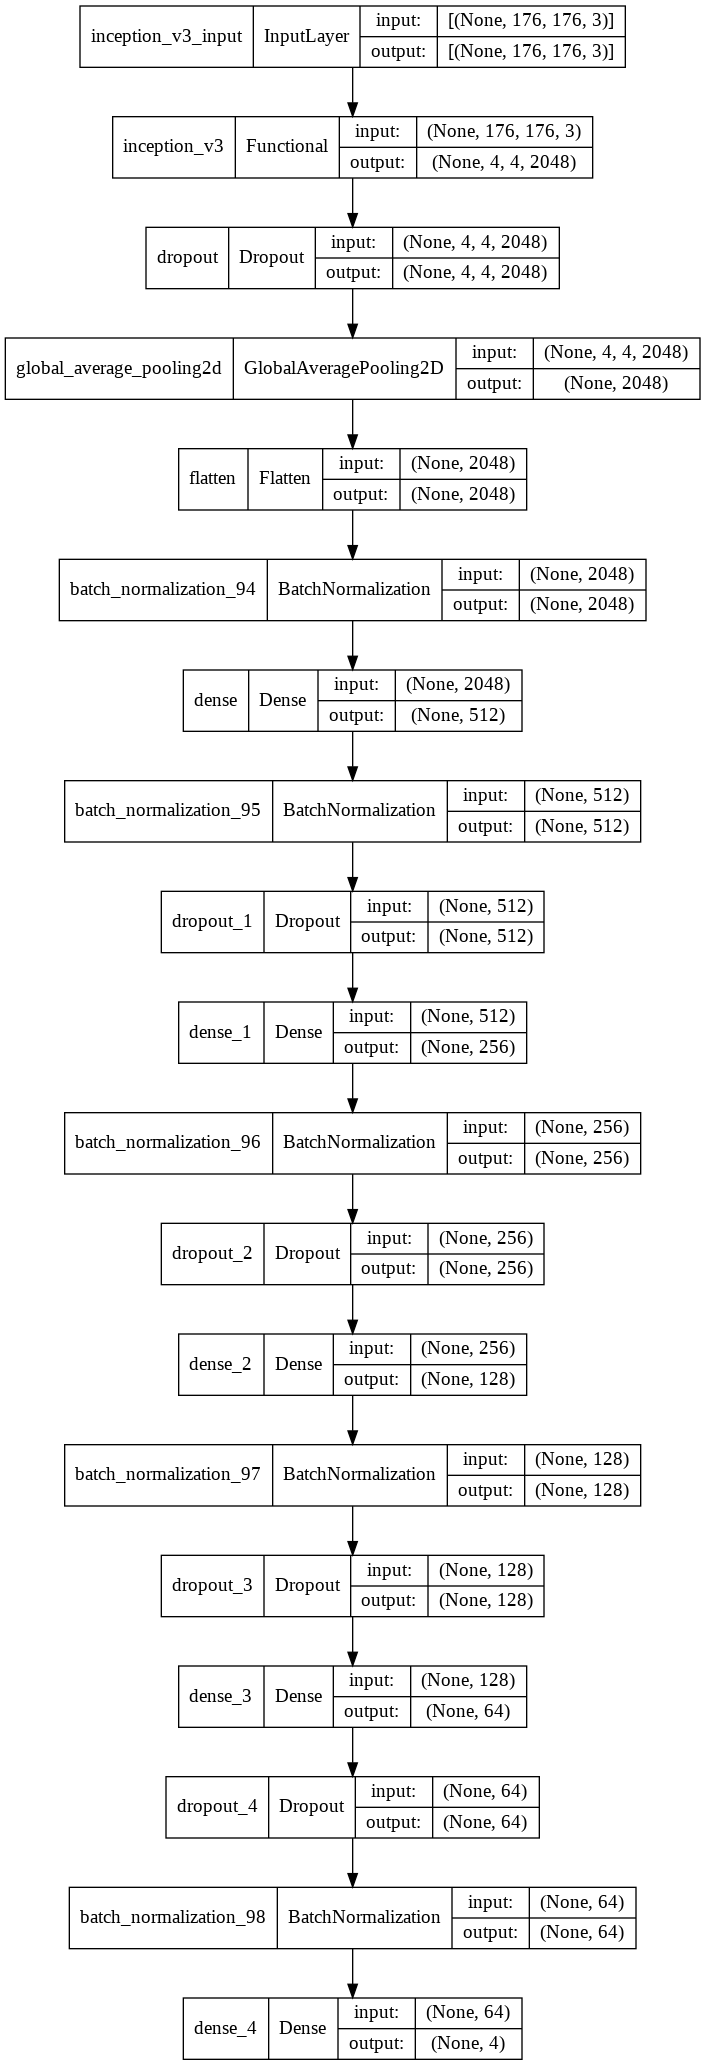

In [87]:
# Plot model architecture:

plot_model(pretrained_model, to_file=root_dir + "models/alzheimer_inception_model_2022_02_12_1.png", show_shapes=True, show_layer_names=True)

___Here is an image just in case the above cell does not work.___

![alzheimer_inception_model_2022_02_12_1](./models/alzheimer_inception_model_2022_02_12_1.png)

___Although these results do not look good, in a real-world more powerful environment, as opposed to a project (Google Colab, or similar) environment, with powerful GPUs or TPUs, these results will greatly improved, and this architecture will prove efficient at predictions with good scores.___

___I am not satisfied with the performance of the current architecture and model in Google Colab, and therefore there is no point in me extending it at the moment with my innovative ideas. Let's see if we can do something else which will allow us to do that in the next section.___

---

---

---

## Building our own DIY model MK1

_I was not happy with the results in the previous section._

_I credit the bad results mainly to the restrictions of Google Colab and partially to the innovative way I am building the dataset._

_So, this is why I wanted to try building the dataset in a more standard way, and also building my own model architecture without transfer learning of a big model, hoping that a smaller model would train quicker in Google Colab._

_The work in the following section is inspired and heavily based on the following articles._
_They are used for groundwork for setting up, and for demonstrating some of the Deep Learning concepts outlined in this article._

- Alzheimer-MRI-Model-+-TensorFlow-2.3-Data-Loading [[Reference]](#Alzheimer-MRI-Model-+-TensorFlow-2.3-Data-Loading)

_The model architecture from this Notebook is modular in functions and is easily changed and extended which is exactly what I needed._

### Data loading

_We'll be using a Kaggle Alzheimer's dataset for our tutorial. tf.keras has a new preprocessing function that can easily load in images for a directory. In order for this function to work, the data has to be structured in a file directory format._

```
main_directory/
    class1/
        class1_images
    class2/
        class2_images
```

_If you input the main_directory into the tf.keras function, it will figure out the rest! In our case, the train directory is our main directory._

_We are also specifying a 80:20 split for our training and validation datasets._

In [88]:
diy_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir+"train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE
)

diy_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir+"train",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE
)

diy_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir+"test",
    seed=1337,
    image_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.
Found 1279 files belonging to 4 classes.


_We'll be renaming the class names and specifying the number of classes. In this case, we have 4 classes of dementia._

In [89]:
diy_train_ds.class_names = CLASSES
diy_val_ds.class_names = CLASSES

### Feature Engineering

_Because we are working with categorical and noncontinuous data, we want to convert our model into one-hot encodings._

_One-hot encodings are a way for the model to understand that we're looking at categorical instead of continuous data._

_Transforming features so that they'll be more understandable is called feature engineering._


In [90]:
# Assigning one hot encoding of labels to train and val dataset:

def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


train_dataset_ohe = diy_train_ds.map(one_hot_label)
print(type(train_dataset_ohe))
print(train_dataset_ohe)
print(len(train_dataset_ohe))



val_dataset_ohe = diy_val_ds.map(one_hot_label) 
print(type(val_dataset_ohe))
print(val_dataset_ohe)
print(len(val_dataset_ohe))

test_ds_ohe = diy_test_ds.map(one_hot_label)
print(type(test_ds_ohe))
print(test_ds_ohe)
print(len(test_ds_ohe))

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
<MapDataset shapes: ((None, 176, 176, 3), (None, 4)), types: (tf.float32, tf.float32)>
129
<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
<MapDataset shapes: ((None, 176, 176, 3), (None, 4)), types: (tf.float32, tf.float32)>
32
<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
<MapDataset shapes: ((None, 176, 176, 3), (None, 4)), types: (tf.float32, tf.float32)>
40


In [91]:
train_dataset_ohe = train_dataset_ohe.repeat(BATCH_SIZE)
val_dataset_ohe = val_dataset_ohe.repeat(BATCH_SIZE)
test_ds_ohe = test_ds_ohe.repeat(BATCH_SIZE)

### Deciding a Metric

The most conventional metric to use is probably accuracy. Accuracy, however, cannot be used for imbalanced datasets. Let's check how many images are in each class for our training data.

In [92]:
NUM_IMAGES_PER_CLASS = []

for label in CLASSES:
    dir_name = base_dir+"train/" + label[:-2] + 'ed'
    NUM_IMAGES_PER_CLASS.append(len([name for name in os.listdir(dir_name)]))

NUM_IMAGES_PER_CLASS

[2560, 1792, 717, 52]

Our dataset is not balanced, so we cannot use accuracy as our metric. For this tutorial, we will be using ROC AUC. Intuitively, ROC AUC gives a score, with higher scores closer to 1 indicating that the different classes can be distinguishable for the model. A lower score closer indicates that the the model cannot distinguish between different classes. A score of 0.5 indicates that the ordering the images is pretty much random.

### Building the model

_We'll be using the same architecture for our model as my [Pneumonia Classification NB](#TensorFlow-Pneumonia-Classification-on-X-rays). Using tf.keras, we can easily build up the layers of our CNN._

In [93]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

In [94]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [95]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

In [96]:
with strategy.scope():
    model = build_model()
    
    model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=METRICS
    )

### Training the Model

_To more efficiently train our model. We will be using callbacks to adjust our learning rate and to stop our model once it converges._

_The [learning rate](https://developers.google.com/machine-learning/glossary#learning-rate) is a very important hyperparameter in the model. Having a LR that is too high will prevent the model from converging. Having a LR that is too slow will make the process too long. Stopping our model early is one mechanism that prevents overfitting._

In [97]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

NEW_CALLBACKS = [checkpoint_cb, early_stopping_cb, my_callback, rop_callback, lr_scheduler]

print(NEW_CALLBACKS)

[<keras.callbacks.ModelCheckpoint object at 0x7f2e9b938510>, <keras.callbacks.EarlyStopping object at 0x7f2e9b940410>, <__main__.MyCallback object at 0x7f2e9b9a1710>, <keras.callbacks.ReduceLROnPlateau object at 0x7f2e9be4f850>, <keras.callbacks.LearningRateScheduler object at 0x7f2e9896b5d0>]


### Let's fit our model!

_Please keep in mind the cell below took about 1 hour to execute in Google Colab. And that is with a small number of epochs and steps per epoch._

In [98]:
diy_model_history = model.fit(train_dataset_ohe,
                              validation_data=val_dataset_ohe,
                              callbacks=NEW_CALLBACKS,
                              epochs=4,
                              steps_per_epoch=16,
                              validation_steps=2)

Epoch 1/4
16/16 [==============================] - 122s 6s/step - loss: 1.7487 - acc: 0.3621 - auc: 0.6001 - f1_score: 0.2612 - val_loss: 1.5557 - val_acc: 0.2812 - val_auc: 0.5918 - val_f1_score: 0.1098 - lr: 0.0100
Epoch 2/4
16/16 [==============================] - 44s 3s/step - loss: 1.3085 - acc: 0.4609 - auc: 0.7179 - f1_score: 0.2776 - val_loss: 2.6647 - val_acc: 0.2188 - val_auc: 0.4662 - val_f1_score: 0.0897 - lr: 0.0089
Epoch 3/4
16/16 [==============================] - 47s 3s/step - loss: 1.1592 - acc: 0.5215 - auc: 0.7684 - f1_score: 0.2710 - val_loss: 2.2737 - val_acc: 0.4219 - val_auc: 0.6624 - val_f1_score: 0.1484 - lr: 0.0079
Epoch 4/4
16/16 [==============================] - 48s 3s/step - loss: 1.0890 - acc: 0.5352 - auc: 0.7910 - f1_score: 0.2823 - val_loss: 1.9579 - val_acc: 0.2031 - val_auc: 0.6054 - val_f1_score: 0.1124 - lr: 7.0795e-04


In [99]:
### Reference: https://stackoverflow.com/questions/64890298/nonetype-object-is-not-subscriptable-when-viewing-the-history

### Dump and load history:

joblib.dump(diy_model_history, root_dir+"history/diy_model_2022_02_12_1")

INFO:tensorflow:Assets written to: ram://02bdf242-5637-479e-93c8-4711fdb3eacf/assets


['./history/diy_model_2022_02_12_1']

In [100]:
### Reference: https://stackoverflow.com/questions/64890298/nonetype-object-is-not-subscriptable-when-viewing-the-history

### Load history:

diy_model_history = joblib.load(root_dir+"history/diy_model_2022_02_12_1")

___Well these results do not look as good as expected, the `loss` function is high, and the `accuracy` is low, and these should really be the other way around.___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training.___

___The `epoch` hyperparameter should really be much bigger, around `512` for example, and the `steps_per_epoch` should really be around `256` for example. Unfortunately we are limited by the `BATCH_SIZE` constant, as it is correlated to the `epoch` and `steps_per_epoch` hyperparameters and the way they are calculated. We have set the `BATCH_SIZE` constant to a low number, only due to the Google Colab limitations.___

### Saving our model

In [101]:
save_model(model, "models/diy_model_2022_02_12_1")

### Visualize model metrics

Let's graph the `ROC AUC` metric and loss after each epoch for the training and validation data. Although we didn't use a random seed for our notebook, the results may slightly vary, generally the scores for the validataion data is similar, if not better, than the training dataset.

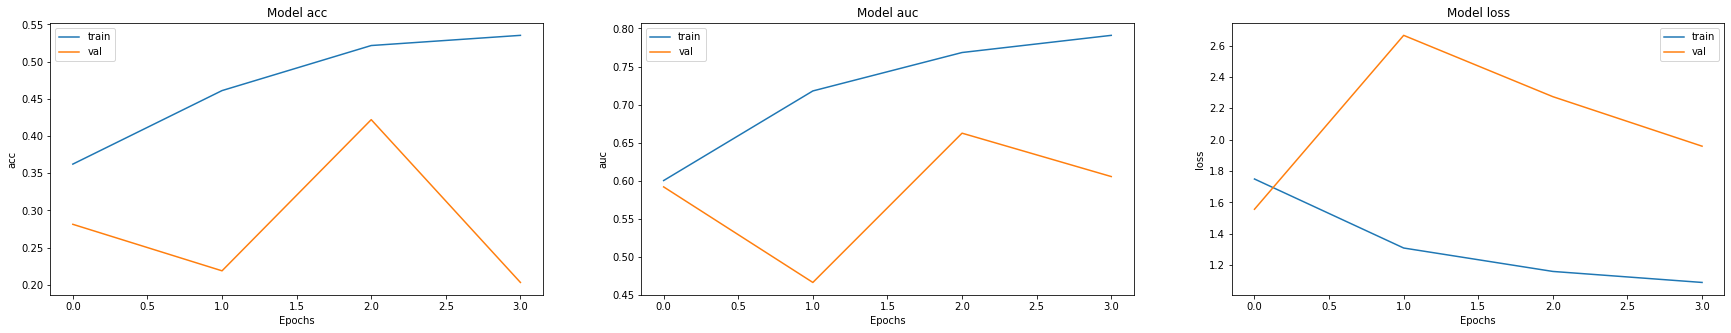

In [102]:
plot_history_metrics(diy_model_history)

___Well these results do not look as good as expected, the `auc roc curve` does not have a good "curve".___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training.___

### Evaluate the model

Although we used the validatation dataset to continually evaluate the model, we also have a separate testing dataset.

In [103]:
# Evaluating the model on the data

diy_test_scores = model.evaluate(test_ds_ohe)

print("Testing Accuracy: %.2f%%"%(diy_test_scores[1] * 100))


1280/1280 [==============================] - 1129s 858ms/step - loss: 2.2773 - acc: 0.1431 - auc: 0.5446 - f1_score: 0.0734
Testing Accuracy: 14.31%


___Well these results do not look as good as expected, the `Accuracy` is very low.___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training due to the reasons explained in the [Disclaimer](#Disclaimer) section.___

### Loading the saved model

In [104]:
diy_model = tf.keras.models.load_model(root_dir + "models/diy_model_2022_02_12_1")

### Plotting the model architecture

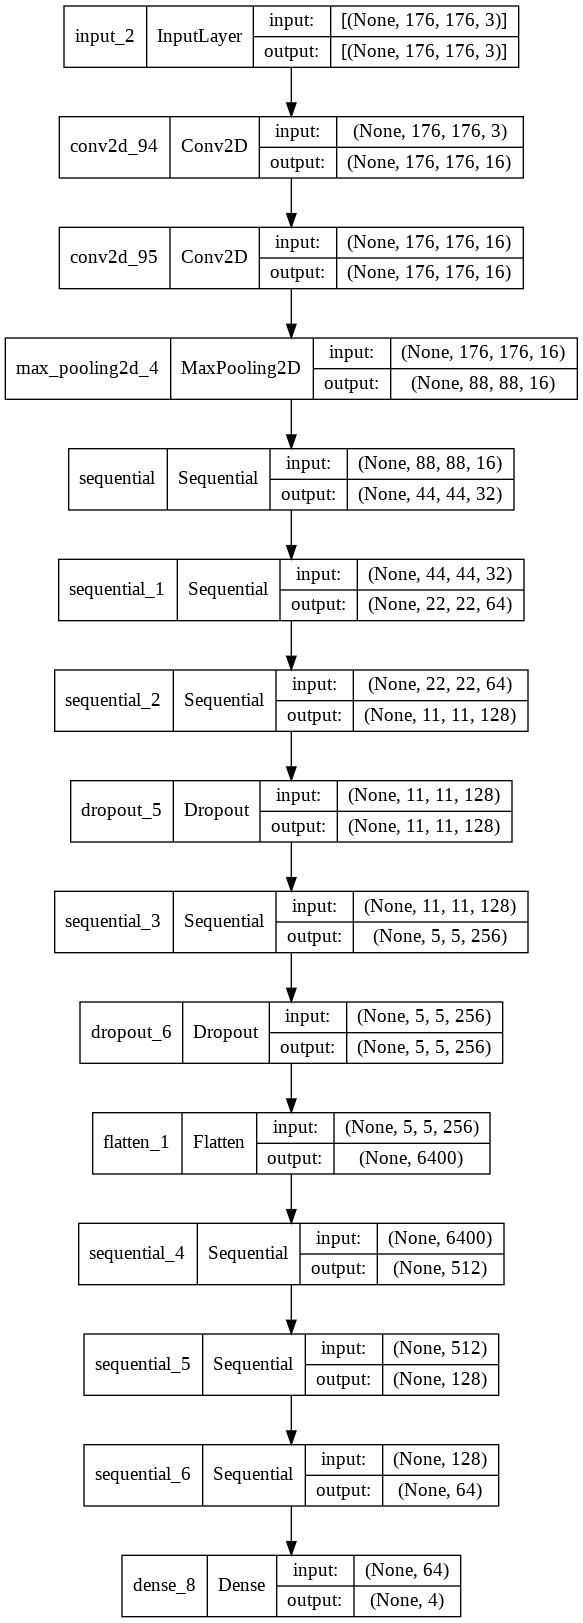

In [105]:
# Plot model architecture:

plot_model(diy_model, to_file=root_dir + "models/diy_model_2022_02_12_1.png", show_shapes=True, show_layer_names=True)

___Here is an image just in case the above cell does not work.___

![diy_model_2022_02_12_1.png](./models/diy_model_2022_02_12_1.png)

___Although these results do not look good, in a real-world more powerful environment, as opposed to a project (Google Colab, or similar) environment, with powerful GPUs or TPUs, these results will greatly improved, and this architecture will prove efficient at predictions with good scores.___

___I am not satisfied with the performance of the current architecture and model in Google Colab, and therefore there is no point in me extending it at the moment with my innovative ideas. Let's see if we can do something else which will allow us to do that in the next section.___

---

---

---

## Building our own DIY model MK 2

_I was not happy with the results in the previous two experiments._

_I credit the bad results mainly to the restrictions of Google Colab and partially to the innovative way I am building the dataset._

_So, this is why I wanted to try building the dataset in a more better way, and also building my own model architecture without transfer learning of a big model, hoping that a smaller model would train quicker in Google Colab._

_The work in the following section is inspired and heavily based on the following articles._
_They are used for groundwork for setting up, and for demonstrating some of the Deep Learning concepts outlined in this article._

- CNN-Alzheimer-MRI-images [[Reference]](#CNN-Alzheimer-MRI-images)

_The model architecture from this Notebook is modular in functions and is easily changed and extended which is exactly what I needed._

### Define auxiliary functions

The following cells supplies auxiliary functions that can be used to achieve the objectives of the present script

1. dataset_basic_info         -> display basic information on the data sets.


2. build_model_ann_conv       -> return a Keras model object of a convolutional neural network built according to input specs provided by the user.


3. build_model_pretrained_cnn -> return a Keras model object of a convolutional neural network made of a pretrained convolutional base (specified by the user) and a dense classifier (standard neural network) built according to input specs provided by the user.


4. display_input_images       -> display batches of images from the train or test data set, credits to Amy Jang, see https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays/notebook#5.-Correct-for-data-imbalance [[Reference]](https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays/notebook#5.-Correct-for-data-imbalance)


5. analyze_performances       -> plot the trajectories of four different performance metrics (i.e., loss, accuracy, precision and recall) recorded at the end of each epoch for both the testing and the validation phases.


6. model_evaluation          -> evaluate the ability of the trained model to predict the labels of previously unseen samples (test set). Display the same metrics examined in the training phase and the confusion matrix.        

In [106]:
def dataset_basic_info(generator, name):
        print('The ' + name + ' data set includes ' + str(generator.samples) + ' samples.')
        print('The ' + name + ' image shapes is ' + str(generator.image_shape))
        keys = [el for el in generator.class_indices.keys()]
        print('The ' + name + ' data set includes the following labels: ')
        print(keys)
        labels     = generator.labels
        cat_labels = []
        for i in range(len(labels)):
            for j in range(len(keys)):
                if (labels[i] == j):
                    cat_labels.append(keys[j])
                    break
        occurrences = []
        for key in keys:
            counter = 0
            for i in range(len(cat_labels)):
                if cat_labels[i] == key:
                    counter += 1
            occurrences.append(counter)
        print(name + ' data set labels frequencies:')
        weights = {}
        for i in range(len(keys)):
            print(keys[i] + ': ' + str(occurrences[i]) + ' (absolute), ' + str(round(occurrences[i]/float(generator.samples), 3)) + ' (relative).' )
            weights[i] = generator.samples/np.array(occurrences[i])*(1.0/float(len(keys)))
        
        return weights


def build_model_cnn(regression_problem, conv_filters, conv_filter_shape, conv_activation_function, conv_padding, conv_pooling_type, conv_pooling_shape, hidden_layers_neurons, hidden_activation_function, L1_coeffs, L2_coeffs, hidden_layers_dropout, final_layer_neurons, final_activation_function, shape, model_optimizer, loss_function, metrics):
    
    model = models.Sequential()
    
    for i in range(len(conv_activation_function)):
        
        if (i == 0):
            model.add(layers.Conv2D(conv_filters[i],
                                    (conv_filter_shape[i][0],conv_filter_shape[i][1]), 
                                    activation = conv_activation_function[i], 
                                    padding    = conv_padding[i],
                                    input_shape = (shape[0],shape[1],shape[2])))             
        else:
            model.add(layers.Conv2D(conv_filters[i],
                                    (conv_filter_shape[i][0],conv_filter_shape[i][1]), 
                                    activation = conv_activation_function[i],
                                    padding    = conv_padding[i]))
        
        if (conv_pooling_type[i] == 'max'):
            model.add(layers.MaxPooling2D((conv_pooling_shape[i][0],conv_pooling_shape[i][1])))
        elif (conv_pooling_type[i] == 'avg'):
            model.add(layers.AveragePooling2D((conv_pooling_shape[i][0],conv_pooling_shape[i][1])))
        else:
            'no pooling'
            
    model.add(layers.Flatten())
    
    for i in range(len(hidden_activation_function)):

        model.add(layers.Dense(hidden_layers_neurons[i], 
                               kernel_regularizer = regularizers.l1_l2(l1 = L1_coeffs[i], l2 =  L2_coeffs[i]),  
                               activation=hidden_activation_function[i]))
        if (hidden_layers_dropout[i] > 0.0):
            model.add(layers.Dropout(hidden_layers_dropout[i]))
    if regression_problem:
            model.add(layers.Dense(final_layer_neurons))
    else:
            model.add(layers.Dense(final_layer_neurons,activation = final_activation_function))
            
    model.compile(optimizer = model_optimizer, loss = loss_function, metrics = metrics)
    
    model.summary()
    
    return model

def build_model_pretrained_cnn(pre_trained_model, include_top, regression_problem, hidden_layers_neurons, hidden_activation_function, L1_coeffs, L2_coeffs, hidden_layers_dropout, final_layer_neurons, final_activation_function, model_optimizer, loss_function, metrics):
    
    model = models.Sequential()
    model.add(pre_trained_model)
    
    if (include_top == False):
        
            model.add(layers.Flatten())

            for i in range(len(hidden_activation_function)):

                model.add(layers.Dense(hidden_layers_neurons[i], 
                                       kernel_regularizer = regularizers.l1_l2(l1 = L1_coeffs[i], l2 =  L2_coeffs[i]),  
                                       activation=hidden_activation_function[i]))
                if (hidden_layers_dropout[i] > 0.0):
                    model.add(layers.Dropout(hidden_layers_dropout[i]))
            if regression_problem:
                    model.add(layers.Dense(final_layer_neurons))
            else:
                    model.add(layers.Dense(final_layer_neurons,activation = final_activation_function))
            
    model.compile(optimizer = model_optimizer, loss = loss_function, metrics = metrics)
    
    model.summary()
    
    return model

def display_input_images(generator, max_n_figures, batch_size, grid_size, fig_size):
    
    fig_counter = 0
    for image_batch, label_batch in generator: 
        plt.figure(figsize=(fig_size[0],fig_size[1]))
        for j in range(batch_size):
            ax   = plt.subplot(grid_size[0], grid_size[1], j + 1)
            plt.imshow(image_batch[j])
            if (label_batch[j][0] == 1):
                    plt.title('MildDemented')
            elif (label_batch[j][1] == 1):
                    plt.title('ModerateDemented')
            elif (label_batch[j][2] == 1):
                    plt.title('NonDemented')
            else:
                    plt.title('VeryMildDemented')
            plt.axis("off")
        plt.show()
        fig_counter += 1
        if (fig_counter == max_n_figures): break

def analyze_performances(hst, epochs):
    history_dict             = hst.history
    loss_values              = history_dict['loss']
    validation_loss_values   = history_dict['val_loss']
    acc_values               = history_dict['categorical_accuracy']
    validation_acc_values    = history_dict['val_categorical_accuracy']
    auc_values               = history_dict['multiclass_AUC']
    validation_auc_values    = history_dict['val_multiclass_AUC']
    epochs                   = range(1,len(loss_values) + 1)
    fig, axes                = plt.subplots(1,3,figsize = (30,10))
    training_ts              = [loss_values, acc_values, auc_values]
    validation_ts            = [validation_loss_values, validation_acc_values, validation_auc_values]
    metric_names             = ['loss', 'categorical accuracy','average multiclass AUC']
    for i in range(len(axes)):
        axes[i].plot(epochs,training_ts[i],color = 'r',label = 'training')
        axes[i].plot(epochs,validation_ts[i],color = 'b',label = 'validation')
        axes[i].set_xlabel('epoch')
        axes[i].set_ylabel(metric_names[i])
        axes[i].set_title(metric_names[i] + ' analysis')
        axes[i].set_xticks(np.arange(0,epochs[-1] + 1,5))
        axes[i].set_yticks(np.arange(0,1.1,0.1))
        axes[i].set_xlim([1,epochs[-1]])
        axes[i].set_ylim([np.min([np.min(training_ts[i]),np.min(validation_ts[i])]),np.max([np.max(training_ts[i]),np.max(validation_ts[i])])])
        axes[i].legend()
    plt.show()


def model_evaluation(model, test_generator):
    test_loss_1, test_acc_1, test_auc_1 = model.evaluate_generator(test_generator, verbose=0)
    print('The value of the loss function on the test data set is: ' + str(round(test_loss_1,4)))
    print('The categorical accuracy of the predictions on the test data set is: ' + str(round(test_acc_1,4)))
    print('The categorical AUC (i.e., average curve across classes) of the predictions on the test data set is: ' + str(round(test_auc_1,4)))
    
    class_labels = list(test_generator.class_indices.keys())
    predictions = []
    true        = []
    ctr         = 0
    for batch, label in test_generator:
        prediction = model.predict(batch).argmax(axis = -1)
        predictions.extend(prediction)
        true.extend(label.argmax(axis = -1))
        ctr += len(prediction)
        if ctr >= len(test_generator.labels):
            break
            
    matrix     = confusion_matrix(true,predictions)
    rel_matrix = matrix/np.sum(matrix,axis = 0)
    fig, axes  = plt.subplots(1,2,figsize = (20,40))

    image1 = axes[0].imshow(matrix, cmap=plt.get_cmap('GnBu'))
    for (i, j), e in np.ndenumerate(matrix):
        axes[0].text(j, i, s = str(e), ha='center', va='center')
    axes[0].set_xticks(np.arange(0,len(class_labels), 1))
    axes[0].set_xticklabels(class_labels)
    axes[0].set_yticks(np.arange(0,len(class_labels), 1))
    axes[0].set_yticklabels(class_labels)
    axes[0].set_title('Confusion Matrix')
    
    image2 = axes[1].imshow(matrix/np.sum(matrix,axis = 0), cmap=plt.get_cmap('GnBu'))
    for (i, j), e in np.ndenumerate(rel_matrix):
        axes[1].text(j, i, s = str(np.round(e,2)), ha='center', va='center')
    axes[1].set_xticks(np.arange(0,len(class_labels), 1))
    axes[1].set_xticklabels(class_labels)
    axes[1].set_yticks(np.arange(0,len(class_labels), 1))
    axes[1].set_yticklabels(class_labels)
    plt.subplots_adjust(wspace = 0.5)
    axes[1].set_title('Confusion Matrix (Relative)')                      
    plt.show()

### Input dashboard

_We let the user set several variables that affect the estimation of the model:_

* training_path -> specify the path of the training images. NOTE: the next level should include k folder, where k is the number of different possible labels (e.g. k = 2, dogs and cats).


* test_path -> specify the path of the test images. NOTE: the next level should include k folder, where k is the number of different possible labels (e.g. k = 2, dogs and cats).


* validation_split    -> fraction of the images in the test data folder that should be used as validation subset during the training of the model.


* regression_problem  -> indicates whether we are facing a regression problem. If = True, the final layer of the densely connected neural network won't have any specified activation function.   


* target_img_shape_1  -> the first desired dimension for the images; an input for the Keras function flow_from_directory that is applied to an ImageDataGenerator.


* target_img_shape_2  -> the second desired dimension for the images; an input for the Keras function flow_from_directory that is applied to an ImageDataGenerator.


* target_img_channels -> the number of desired channels for the images; an input for the Keras function flow_from_directory that is applied to an ImageDataGenerator. E.g. 3 channels for RGB images.


* conv_filters        -> list including the number of different filters that are used in each convolution.


* conv_filter_shape   -> list of k lists, where k is the number of desired convolutions. Each of these k lists includes two integers representing the dimensions (in number of cells) of each filter that slides across the picture.


* conv_activation_function -> list including the names of the activation function that should be used in each convolution. Note: we have a product between a patch of the image and the filter. Then, the entries of the resulting matrix are summed up. This sum serves as the argument of the activation function g().


* conv_padding -> list including the type of padding that should be used in each convolution. The string 'valid' means that no padding should be applied on the borders of the image. 'same' means that the image is padded such that the output of the convolution retains the same shape.


* conv_pooling_type   -> list including the type of pooling that must be applied after each convolution. The string 'max' implements max pooling, the string 'avg' implements average pooling, any other string means no pooling after the current convolution.


* conv_pooling_coeffs -> list of k lists, where k is the number of desired convolutions. Each of these k lists includes two integers representing the dimensions (in number of cells) of the pooling operation region that is applied across the convolved image.


* augment_data -> boolean indicating whether the images in the training data set should be augmented by applying a broad range of actions, such as rotations, shearing, zooming, flipping etc.


* rotation_range -> specifies the range (in degrees) of random rotations of the input images.


* width_shift_range -> specifies the range (in fractions of the image width) of random horizontal shifts of the input images.


* height_shift_range -> specifies the range (in fractions of the image height) of random vertical shifts of the input images.


* shear_range -> specifies the symmetric range -x, x of random shears of the input images.


* brightness_range -> list including the lower and upper extremes of the range of image brightness values that are randomly applied to the input images. 


* zoom_range -> specifies the symmetric range 1 - x, 1 + x of random zooms of the input images.


* horizontal_flip -> boolean indicating whether the columns of the training images should be randomly flipped.


* fill_mode -> name of the method that should be used to fill the new empty pixels emerged during data augmentation procedures.


* print_sample_input -> boolean indicating whether a sample of the input images shall be printed.


* hidden_activation_function -> list containing the name of the activation functions (available in Keras) used in the hidden layers of the densely connected neural network that follows the sequence of convolutions.


* hidden_layers_neurons -> list containing the number of neurons forming each hidden layer of the densely connected neural network that follows the sequence of convolutions.


* hidden_layers_L1_coeffs -> list containing scalars multiplying the L1-penalty terms for each hidden layer weights of the densely connected neural network that follows the sequence of convolutions. Set it to 0 to avoid L1-regularization.


* hidden_layers_L2_coeffs -> list containing scalars multiplying the L2-penalty terms for each hidden layer weights of the densely connected neural network that follows the sequence of convolutions. Set it to 0 to avoid L2-regularization.


* hidden_layers_dropouts ->  list containing the fractions of weights that are randomly set to zero in each hidden layer of the densely connected neural network that follows the sequence of convolutions. Set it to 0 to avoid dropout regularization.


* final_activation_function -> name of the activation function (available in Keras) used in the terminal layer of the densely connected neural network that follows the sequence of convolutions.


* final_layer_neurons -> number of neurons forming the terminal layer of the densely connected neural network that follows the sequence of convolutions.


* model_optimizer -> name of the method (available in Keras) to iteratively update the search of the set of parameters that minimize the loss function.


* loss_function -> name the loss function (available in Keras) that we seek to minimize.


* metrics -> list containing the name of the metrics (available in Keras) that we use to assess the performances of the model.


* n_epochs -> the times the optimization algorithm goes through the entire training data set.


* batch_size -> the number of samples included in a single batch.


* steps_per_epoch -> the number of batches that form an epoch during the training phase. 


* vgg_hidden_activation_function -> list containing the name of the activation functions (available in Keras) used in the hidden layers of the densely connected neural network classifier that follows the pretrained VGG19 CNN.


* vgg_hidden_layers_neurons -> list containing the number of neurons forming each hidden layer of the densely connected neural network classifier that follows the pretrained VGG19 CNN.


* vgg_hidden_layers_L1_coeffs -> list containing scalars multiplying the L1-penalty terms for each hidden layer weights of the densely connected neural network classifier that follows the pretrained VGG19 CNN. Set it to 0 to avoid L1-regularization.


* vgg_hidden_layers_L2_coeffs -> list containing scalars multiplying the L2-penalty terms for each hidden layer weights of the densely connected neural network classifier that follows the pretrained VGG19 CNN. Set it to 0 to avoid L2-regularization.


* vgg_hidden_layers_dropouts ->  list containing the fractions of weights that are randomly set to zero in each hidden layer of the densely connected neural network classifier that follows the pretrained VGG19 CNN. Set it to 0 to avoid dropout regularization.


* vgg_final_activation_function -> name of the activation function (available in Keras) used in the terminal layer of the densely connected neural network classifier that follows the pretrained VGG19 CNN.


* vgg_final_layer_neurons -> number of neurons forming the terminal layer of the densely connected neural network classifier that follows the pretrained VGG19 CNN.


* vgg_n_epochs -> the times the optimization algorithm goes through the entire training data set when the VGG19 based CNN is trained.


* vgg_steps_per_epoch -> the number of batches that form an epoch during the training phase when the VGG19 based CNN is trained.


In [114]:
training_path                  =  base_dir + "/train/"
test_path                      =  base_dir + "/test/"
validation_split               = 0.20
regression_problem             = False
target_img_shape_1             = 224
target_img_shape_2             = 224
target_img_channels            = 3
conv_layers                    = 4
conv_filters                   = [32,64,128,128]   
conv_filter_shape              = [[3,3]]*conv_layers
conv_activation_function       = ['relu']*conv_layers
conv_padding                   = ['valid']*conv_layers
conv_pooling_type              = ['max']*conv_layers
conv_pooling_shape             = [[2,2]]*conv_layers
augment_data                   = True
rotation_range                 = 0.1
width_shift_range              = 0.1
height_shift_range             = 0.1
shear_range                    = 0.1
brightness_range               = [0.8,1.2]
zoom_range                     = 0.1
horizontal_flip                = False
fill_mode                      = 'nearest'
print_sample_input             = True
hidden_activation_function     = ['relu']
hidden_layers_neurons          = [128]
hidden_layers_L1_coeffs        = [0.00]
hidden_layers_L2_coeffs        = [0.00]
hidden_layers_dropout          = [0.00]
final_activation_function      = 'softmax'
final_layer_neurons            = 4
model_optimizer                = tf.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
loss_function                  = 'categorical_crossentropy'
metrics                        = [keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                                  keras.metrics.AUC(multi_label = True, name='multiclass_AUC')]
n_epochs                       = 10
batch_size                     = 128
validation_steps               = 5
vgg_include_top                = False
vgg_hidden_activation_function = ['relu']
vgg_hidden_layers_neurons      = [128]
vgg_hidden_layers_L1_coeffs    = [0.00]
vgg_hidden_layers_L2_coeffs    = [0.00]
vgg_hidden_layers_dropout      = [0.00]
vgg_final_activation_function  = 'softmax'
vgg_final_layer_neurons        = 4
vgg_model_optimizer            = tf.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
vgg_n_epochs                   = 2
vgg_validation_steps           = 2

### Reorganize images in a new folder

_We transfer the available images in three folders (training, validation, testing)._

_We are forced to perfom this action because we want an augmentable training set, a non-augmentable validation set which is drawn from training images and an independent, unseen, test set._

In [115]:
labels              = ['MildDemented','ModerateDemented','NonDemented', 'VeryMildDemented']
new_training_path   = root_dir + "/dataset-split/training_set/"
new_validation_path = root_dir + "/dataset-split/validation_set/"
new_test_path       = root_dir + "/dataset-split/test_set/"
shutil.rmtree(new_training_path, ignore_errors=True)
shutil.rmtree(new_validation_path, ignore_errors=True) 
shutil.rmtree(new_test_path, ignore_errors=True)
[os.makedirs(new_training_path + label,exist_ok=True) for label in labels]
[os.makedirs(new_validation_path + label,exist_ok=True) for label in labels]
[os.makedirs(new_test_path + label,exist_ok=True) for label in labels]
training_label_frequencies   = []
for label in labels:
        training_filenames   = os.listdir(training_path + label + "/") 
        validation_filenames = random.sample(training_filenames, int(len(training_filenames)*validation_split))
        training_filenames   = [file for file in training_filenames if file not in validation_filenames]
        test_filenames       = os.listdir(test_path + label + "/") 
        for file in training_filenames:
            shutil.copy(training_path + label + "/" + file, new_training_path + label + "/" + file)
        print('Training images transfer complete for label: ' + label + '. # transferred images: ' + str(len(training_filenames)))
        for file in validation_filenames:
            shutil.copy(training_path + label + "/" + file, new_validation_path + label + "/" + file)
        print('Validation images transfer complete for label: ' + label + '. # transferred images: '  + str(len(validation_filenames)))
        for file in test_filenames:
            shutil.copy(test_path + label + "/" + file, new_test_path + label + "/" + file)
        print('Test images transfer complete for label: ' + label + '. # transferred images: '  + str(len(test_filenames)))
        
        training_label_frequencies.append(len(training_filenames))


Training images transfer complete for label: MildDemented. # transferred images: 574
Validation images transfer complete for label: MildDemented. # transferred images: 143
Test images transfer complete for label: MildDemented. # transferred images: 179
Training images transfer complete for label: ModerateDemented. # transferred images: 42
Validation images transfer complete for label: ModerateDemented. # transferred images: 10
Test images transfer complete for label: ModerateDemented. # transferred images: 12
Training images transfer complete for label: NonDemented. # transferred images: 2048
Validation images transfer complete for label: NonDemented. # transferred images: 512
Test images transfer complete for label: NonDemented. # transferred images: 640
Training images transfer complete for label: VeryMildDemented. # transferred images: 1434
Validation images transfer complete for label: VeryMildDemented. # transferred images: 358
Test images transfer complete for label: VeryMildDeme

### Correct class label imbalances

_We save copies of existing images belonging to the training data set until the frequencies of the available classes are balanced, e.g., 1/3, 1/3, 1/3 if we have three distinct labels.
Later, we will use data augmentation so that even copies of the same image will end up to be different._

___NOTE: validation and test images do not undergo any augmentation procedure.___

In [116]:
training_label_frequencies = np.array(training_label_frequencies)
target_n_samples           = np.max(training_label_frequencies)
for i in range(len(labels)):
    current_label     = labels[i]
    n_missing_samples = target_n_samples - training_label_frequencies[i]
    filenames         = os.listdir(new_training_path + current_label + "/") 
    n_filled          = np.zeros(len(filenames))
    while (np.sum(n_filled) < n_missing_samples):
          idx = np.random.randint(0,len(filenames))
          shutil.copy(new_training_path + current_label + "/" + filenames[idx], new_training_path + current_label + "/" + filenames[idx].replace(".jpg", "_copy_" + str(int(n_filled[idx] + 1)) + ".jpg"))
          n_filled[idx] += 1

### Generate training and test images

_We create three distinct generators (training, validation, test) that we will use later to train and assess the model._

In [119]:
if augment_data:
    train_datagen   = keras.preprocessing.image.ImageDataGenerator(rescale            = 1./255,
                                         rotation_range     = rotation_range,
                                         width_shift_range  = width_shift_range,
                                         height_shift_range = height_shift_range,
                                         shear_range        = shear_range,
                                         brightness_range   = brightness_range,
                                         zoom_range         = zoom_range,
                                         horizontal_flip    = horizontal_flip,
                                         fill_mode          = fill_mode)
else:
    train_datagen   = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

validation_datagen   = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_datagen         = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_generator      = train_datagen.flow_from_directory(new_training_path,target_size = (target_img_shape_1, target_img_shape_2), batch_size = batch_size, class_mode = "categorical")  
validation_generator = validation_datagen.flow_from_directory(new_validation_path,target_size = (target_img_shape_1, target_img_shape_2), batch_size = batch_size, class_mode = "categorical") 
test_generator       = test_datagen.flow_from_directory(new_test_path,target_size = (target_img_shape_1, target_img_shape_2), batch_size = batch_size, class_mode = "categorical") 

Found 8192 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


### Display some sample images

Credits to Amy Jang, see https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays/notebook#5.-Correct-for-data-imbalance [[Reference]](https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays/notebook#5.-Correct-for-data-imbalance).

In [120]:
# if print_sample_input:
#     display_input_images(train_generator, 2, batch_size, [8,5], [30,30])

### Display basic information on train and test images

_We use the function "dataset_basic_info()" to display some basic information, e.g., # samples, image shape, labels frequencies, for each dataset._

In [121]:
train_labels_weights_dict      = dataset_basic_info(train_generator, 'training')
validation_labels_weights_dict = dataset_basic_info(validation_generator, 'validation')
test_labels_weights_dict       = dataset_basic_info(test_generator, 'test')

The training data set includes 8192 samples.
The training image shapes is (224, 224, 3)
The training data set includes the following labels: 
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
training data set labels frequencies:
MildDemented: 2048 (absolute), 0.25 (relative).
ModerateDemented: 2048 (absolute), 0.25 (relative).
NonDemented: 2048 (absolute), 0.25 (relative).
VeryMildDemented: 2048 (absolute), 0.25 (relative).
The validation data set includes 1023 samples.
The validation image shapes is (224, 224, 3)
The validation data set includes the following labels: 
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
validation data set labels frequencies:
MildDemented: 143 (absolute), 0.14 (relative).
ModerateDemented: 10 (absolute), 0.01 (relative).
NonDemented: 512 (absolute), 0.5 (relative).
VeryMildDemented: 358 (absolute), 0.35 (relative).
The test data set includes 1279 samples.
The test image shapes is (224, 224, 3)
The test data se

### Build a Convolutional Neural Network (CNN) model

_The input parameters set by the user serve as arguments of a function which returns a Keras model object of a convolutional neural network._

![1_vkQ0hXDaQv57sALXAJquxA.jpg](https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

_Schematics of the typical structure of a neural network model for image recognition._

_Image source:_ https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

[[Reference]](#A-Comprehensive-Guide-to-Convolutional-Neural-Networks-—-the-ELI5-way)

In [122]:
diy_model_2 = build_model_cnn(regression_problem, conv_filters, conv_filter_shape, conv_activation_function, conv_padding, conv_pooling_type, conv_pooling_shape, hidden_layers_neurons, hidden_activation_function, 
                             hidden_layers_L1_coeffs, hidden_layers_L2_coeffs, hidden_layers_dropout, final_layer_neurons, final_activation_function, [target_img_shape_1, target_img_shape_2, target_img_channels], 
                             model_optimizer, loss_function, metrics)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_97 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 128)     

### Let's fit our model!

_Please keep in mind the cell below took about 3 hours to execute in Google Colab. And that is with a small number of epochs and steps per epoch._

In [123]:
early_exit      = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
best_checkpoint = ModelCheckpoint(root_dir + "models/model-diy-2-1/alzheimer_model-diy-2-1.h5",
                                  save_best_only=True, 
                                  monitor='val_multiclass_AUC', 
                                  mode='max')

hst = diy_model_2.fit(train_generator, steps_per_epoch = train_generator.samples//batch_size,
                      epochs = n_epochs,
                      validation_data = validation_generator,
                      validation_steps = validation_generator.samples//batch_size,
                      callbacks =[early_exit, best_checkpoint])
        


Epoch 1/10
64/64 [==============================] - 1117s 17s/step - loss: 1.3909 - categorical_accuracy: 0.2845 - multiclass_AUC: 0.5415 - val_loss: 1.3514 - val_categorical_accuracy: 0.3817 - val_multiclass_AUC: 0.6702
Epoch 2/10
64/64 [==============================] - 1095s 17s/step - loss: 1.1957 - categorical_accuracy: 0.4598 - multiclass_AUC: 0.7115 - val_loss: 1.0839 - val_categorical_accuracy: 0.4967 - val_multiclass_AUC: 0.7731
Epoch 3/10
64/64 [==============================] - 1086s 17s/step - loss: 0.9955 - categorical_accuracy: 0.5594 - multiclass_AUC: 0.7994 - val_loss: 0.9083 - val_categorical_accuracy: 0.5558 - val_multiclass_AUC: 0.8066
Epoch 4/10
64/64 [==============================] - 1093s 17s/step - loss: 0.8266 - categorical_accuracy: 0.6169 - multiclass_AUC: 0.8436 - val_loss: 0.9471 - val_categorical_accuracy: 0.5134 - val_multiclass_AUC: 0.8272
Epoch 5/10
64/64 [==============================] - 1089s 17s/step - loss: 0.7518 - categorical_accuracy: 0.6505 - m

In [124]:
### Reference: https://stackoverflow.com/questions/64890298/nonetype-object-is-not-subscriptable-when-viewing-the-history

### Dump and load history:

joblib.dump(hst, root_dir+"history/diy_model_2_2022_02_13_1")

INFO:tensorflow:Assets written to: ram://a0d927d4-21a0-40be-987a-f0d8b4b7404b/assets


['./history/diy_model_2_2022_02_13_1']

In [125]:
### Reference: https://stackoverflow.com/questions/64890298/nonetype-object-is-not-subscriptable-when-viewing-the-history

### Load history:

hst = joblib.load(root_dir+"history/diy_model_2_2022_02_13_1")

In [126]:
save_model(diy_model_2, "models/diy_model_2_2022_02_13_1")

In [127]:
diy_model_2.load_weights(filepath = root_dir + "models/model-diy-2-1/alzheimer_model-diy-2-1.h5")

### Evaluate the model - Analyze the performance of the model

_We display three different metrics to assess the performances of the model._

1. `loss`                  -> the value of the loss function in each epoch.


2. `categorical accuracy`  -> "Calculates how often predictions matches one-hot labels.", see https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_accuracy [[Reference]](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_accuracy)


3. `multiclass_AUC`        -> "Computes the approximate AUC (Area under the curve) via a Riemann sum for each label and then takes the average.", see https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC [[Reference]](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC)

_These metrics are recorded at the end of each training epoch and plotted in epoch vs. metric diagrams. Red lines represent the pattern of these metrics during training while blue lines represent the pattern of these metrics during the validation phase._

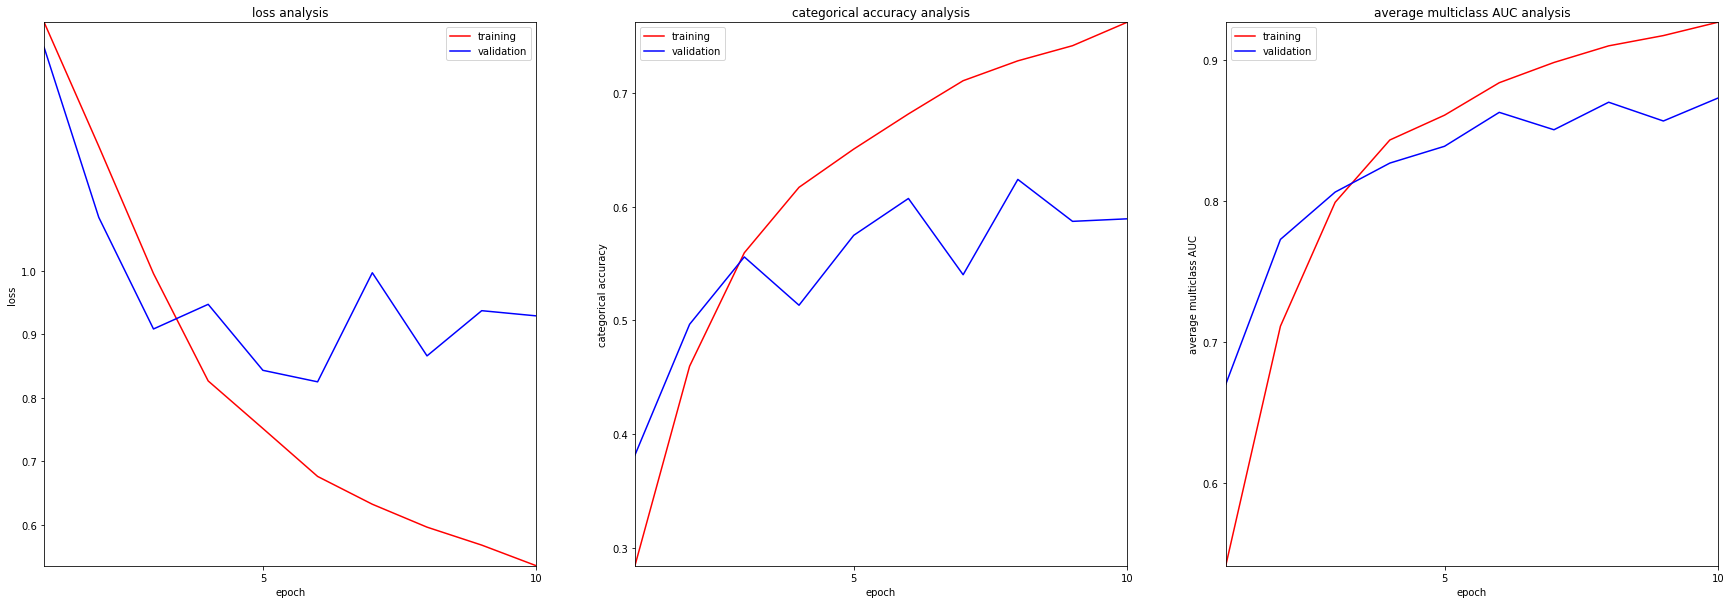

In [128]:
analyze_performances(hst, n_epochs)

### Evaluate the model - Classify the test images

_We use our trained convolutional neural network to predict the labels of previously unseen images contained in the test folder._

The value of the loss function on the test data set is: 0.9869
The categorical accuracy of the predictions on the test data set is: 0.5966
The categorical AUC (i.e., average curve across classes) of the predictions on the test data set is: 0.8149


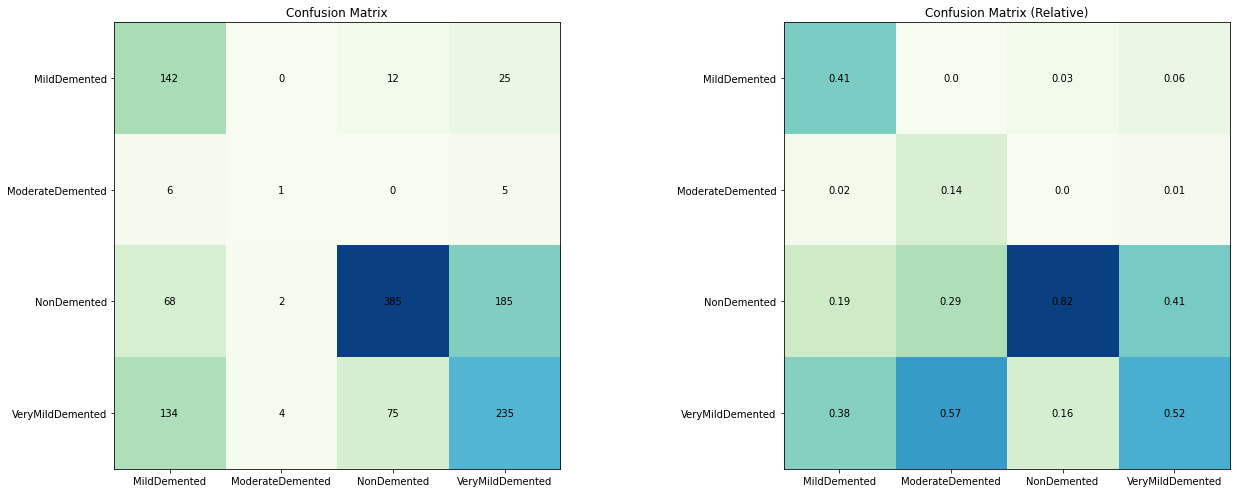

In [129]:
model_evaluation(diy_model_2, test_generator)

___Well these results do not look as good as expected, the `Accuracy` is very low.___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training due to the reasons explained in the [Disclaimer](#Disclaimer) section.___

___However these results are better than our previous experiments and we can use this architecture as a base, and to change and try and improve it.___

### Building DIY model MK 2

_Let's try and improve this architecture and our model by adding more image augmentations as mentioned as one of our ideas in the [Abstract](#Abstract) section._

_Let's defines some custom augmentations._

In [155]:
data_random_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical", seed=42),
  layers.RandomRotation(0.2, seed=42),
  layers.RandomContrast(0.9, seed=42),
  layers.RandomCrop(4, 4, seed=42),
  layers.RandomZoom(0.6, seed=42),
])

print(type(data_random_augmentation))

data_random_augmentation.compile()

<class 'keras.engine.sequential.Sequential'>


_We are going to add our custom augmentations our model architecture._

In [162]:
def build_model_cnn_custom(regression_problem, conv_filters, conv_filter_shape, conv_activation_function, conv_padding, conv_pooling_type, conv_pooling_shape, hidden_layers_neurons, hidden_activation_function, L1_coeffs, L2_coeffs, hidden_layers_dropout, final_layer_neurons, final_activation_function, shape, model_optimizer, loss_function, metrics):
    
    model = models.Sequential()

    data_random_augmentation
    
    for i in range(len(conv_activation_function)):
        
        if (i == 0):
            model.add(layers.Conv2D(conv_filters[i],
                                    (conv_filter_shape[i][0],conv_filter_shape[i][1]), 
                                    activation = conv_activation_function[i], 
                                    padding    = conv_padding[i],
                                    input_shape = (shape[0],shape[1],shape[2])))             
        else:
            model.add(layers.Conv2D(conv_filters[i],
                                    (conv_filter_shape[i][0],conv_filter_shape[i][1]), 
                                    activation = conv_activation_function[i],
                                    padding    = conv_padding[i]))
        
        if (conv_pooling_type[i] == 'max'):
            model.add(layers.MaxPooling2D((conv_pooling_shape[i][0],conv_pooling_shape[i][1])))
        elif (conv_pooling_type[i] == 'avg'):
            model.add(layers.AveragePooling2D((conv_pooling_shape[i][0],conv_pooling_shape[i][1])))
        else:
            'no pooling'

    model.add(layers.Flatten())
    
    for i in range(len(hidden_activation_function)):

        model.add(layers.Dense(hidden_layers_neurons[i], 
                               kernel_regularizer = regularizers.l1_l2(l1 = L1_coeffs[i], l2 =  L2_coeffs[i]),  
                               activation=hidden_activation_function[i]))
        if (hidden_layers_dropout[i] > 0.0):
            model.add(layers.Dropout(hidden_layers_dropout[i]))
    if regression_problem:
            model.add(layers.Dense(final_layer_neurons))
    else:
            model.add(layers.Dense(final_layer_neurons,activation = final_activation_function))
            
    model.compile(optimizer = model_optimizer, loss = loss_function, metrics = metrics)
    
    model.summary()
    
    return model

_Let's build and check our new diy custom model architecture._

In [169]:
LEARNING_RATE = 1e-2

# diy_optimizer = Adam(learning_rate = LEARNING_RATE)
diy_optimizer = tf.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0)

In [171]:
diy_model_3_custom = build_model_cnn_custom(regression_problem,
                                            conv_filters,
                                            conv_filter_shape,
                                            conv_activation_function,
                                            conv_padding, conv_pooling_type,
                                            conv_pooling_shape,
                                            hidden_layers_neurons,
                                            hidden_activation_function,
                                            hidden_layers_L1_coeffs,
                                            hidden_layers_L2_coeffs,
                                            hidden_layers_dropout,
                                            final_layer_neurons,
                                            final_activation_function,
                                            [target_img_shape_1, target_img_shape_2, target_img_channels],
                                            diy_optimizer,
                                            loss_function,
                                            metrics)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_148 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_149 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_150 (Conv2D)         (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 26, 26, 128)    

In [172]:
early_exit      = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
best_checkpoint = ModelCheckpoint(root_dir + "models/diy_model_3_custom/alzheimer_model-diy-2-1.h5",
                                  save_best_only=True, 
                                  monitor='val_multiclass_AUC', 
                                  mode='max')

_We will use `mlflow`, so we can document our experiments in case we want to run multiple series of them._

_Please ignore the error below, it was due to a naming mistake, and I did not need to re-run it, but it is fixed now, in case the notebook is re-run._

In [174]:
experiment_id = mlflow.create_experiment("diy_model_3_custom_exp_2")

MlflowException: ignored

In [ ]:
run_id = mlflow.active_run().info.run_id

In [173]:
tensor_board_cb_1 = TensorBoard(log_dir = root_dir + "logs/logs-" + experiment_id + "-" + run_id,
                                write_graph = True)

#### Let's fit our model!

_Please keep in mind the cell below took about 3 hours to execute in Google Colab. And that is with a small number of epochs and steps per epoch._

In [176]:
with mlflow.start_run(experiment_id = experiment_id) as run:
    mlflow.log_param("learning_rate", LEARNING_RATE)

    run_id = mlflow.active_run().info.run_id

    hst_diy_model_3_custom = diy_model_3_custom.fit(train_generator,
                                                    steps_per_epoch = train_generator.samples//batch_size,
                                                    epochs = n_epochs,
                                                    validation_data = validation_generator,
                                                    validation_steps = validation_generator.samples//batch_size,
                                                    callbacks =[early_exit, best_checkpoint,tensor_board_cb_1])
    
    mlflow.log_param("history", hst_diy_model_3_custom)        

Epoch 1/10
64/64 [==============================] - 1141s 18s/step - loss: 6.0330 - categorical_accuracy: 0.2942 - multiclass_AUC: 0.5645 - val_loss: 1.3847 - val_categorical_accuracy: 0.4944 - val_multiclass_AUC: 0.5000
Epoch 2/10
64/64 [==============================] - 1067s 17s/step - loss: 1.3870 - categorical_accuracy: 0.2432 - multiclass_AUC: 0.4903 - val_loss: 1.3935 - val_categorical_accuracy: 0.1406 - val_multiclass_AUC: 0.5000
Epoch 3/10
64/64 [==============================] - 1058s 16s/step - loss: 1.3870 - categorical_accuracy: 0.2462 - multiclass_AUC: 0.4906 - val_loss: 1.3966 - val_categorical_accuracy: 0.0112 - val_multiclass_AUC: 0.5000
Epoch 4/10
64/64 [==============================] - 1061s 17s/step - loss: 1.3871 - categorical_accuracy: 0.2406 - multiclass_AUC: 0.4895 - val_loss: 1.3994 - val_categorical_accuracy: 0.1507 - val_multiclass_AUC: 0.5000
Epoch 5/10
64/64 [==============================] - 1073s 17s/step - loss: 1.3867 - categorical_accuracy: 0.2434 - m

In [177]:
### Reference: https://stackoverflow.com/questions/64890298/nonetype-object-is-not-subscriptable-when-viewing-the-history

### Dump and load history:

joblib.dump(hst_diy_model_3_custom, root_dir+"history/diy_model_3_custom")

INFO:tensorflow:Assets written to: ram://b45d433f-0ae0-4002-98cb-522d75b58c42/assets


['./history/diy_model_3_custom']

In [178]:
### Reference: https://stackoverflow.com/questions/64890298/nonetype-object-is-not-subscriptable-when-viewing-the-history

### Load history:

hst_diy_model_3_custom = joblib.load(root_dir+"history/diy_model_3_custom")

In [180]:
save_model(diy_model_3_custom, "models/diy_model_3_custom/alzheimer_model-diy-3-1")

In [181]:
diy_model_3_custom.load_weights(filepath = root_dir + "models/diy_model_3_custom/alzheimer_model-diy-3-1")

#### Evaluate the model - Analyze the performance of the model

_We display three different metrics to assess the performances of the model._

1. `loss`                  -> the value of the loss function in each epoch.


2. `categorical accuracy`  -> "Calculates how often predictions matches one-hot labels.", see https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_accuracy [[Reference]](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_accuracy)


3. `multiclass_AUC`        -> "Computes the approximate AUC (Area under the curve) via a Riemann sum for each label and then takes the average.", see https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC [[Reference]](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC)

_These metrics are recorded at the end of each training epoch and plotted in epoch vs. metric diagrams. Red lines represent the pattern of these metrics during training while blue lines represent the pattern of these metrics during the validation phase._

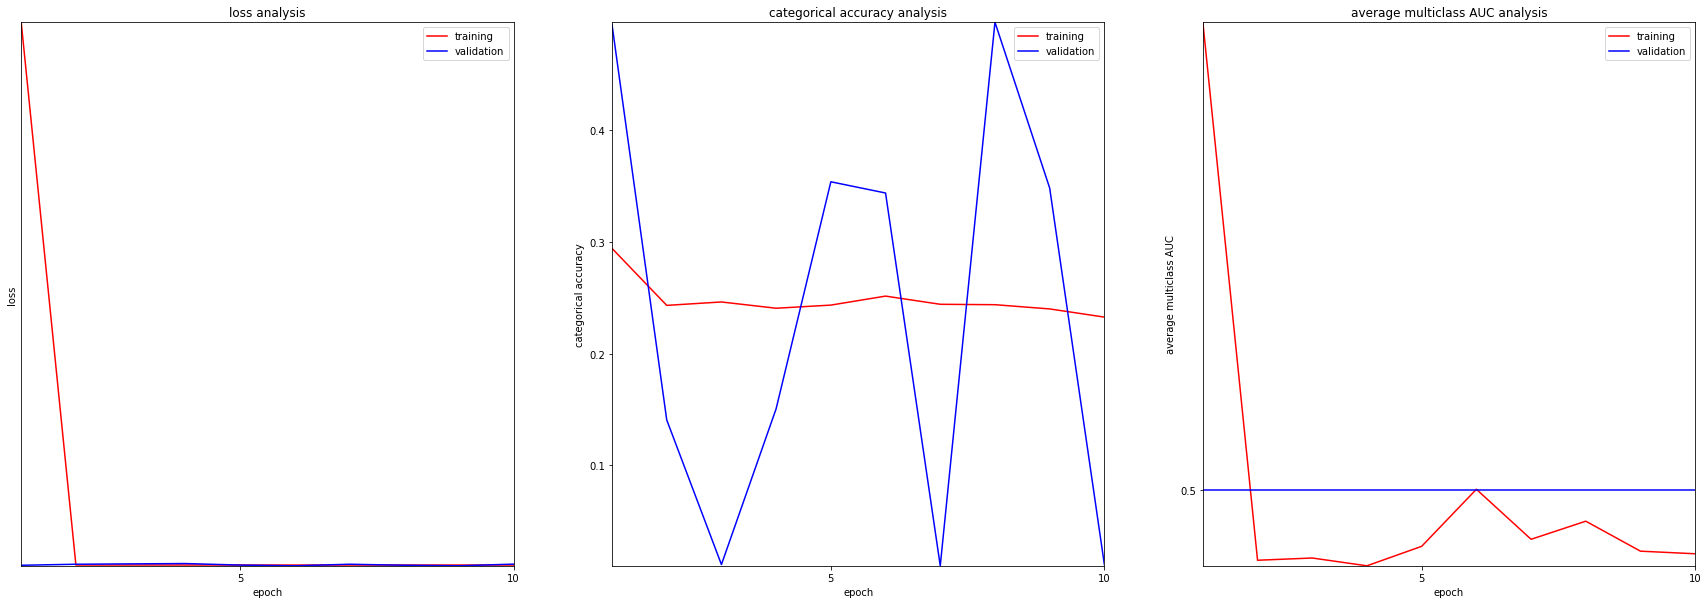

In [182]:
analyze_performances(hst_diy_model_3_custom, n_epochs)

#### Evaluate the model - Classify the test images

_We use our trained convolutional neural network to predict the labels of previously unseen images contained in the test folder._

The value of the loss function on the test data set is: 1.3946
The categorical accuracy of the predictions on the test data set is: 0.0094
The categorical AUC (i.e., average curve across classes) of the predictions on the test data set is: 0.5


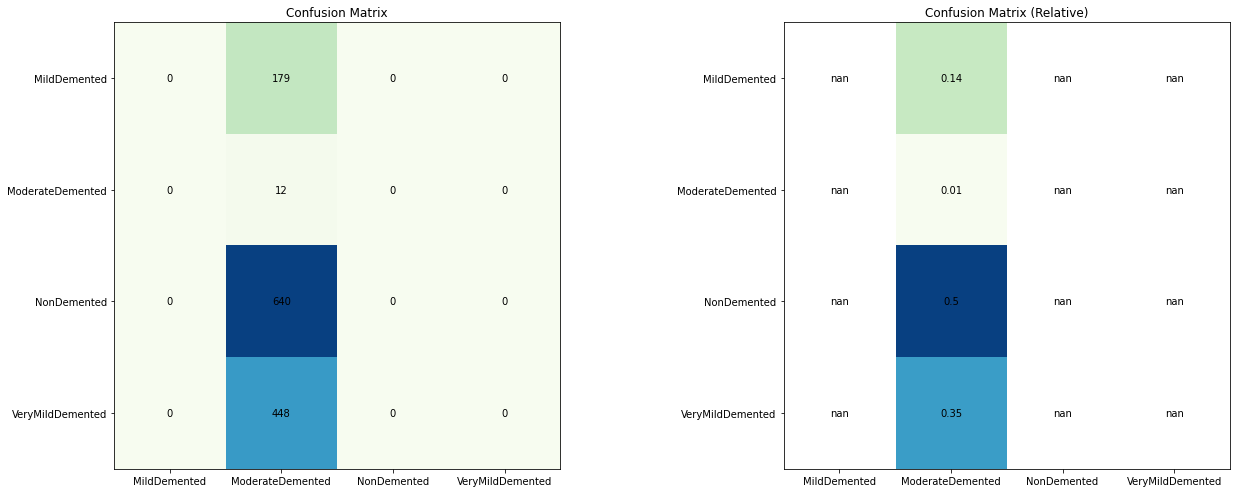

In [183]:
model_evaluation(diy_model_3_custom, test_generator)

### Using Tensorboard and mlflow

_Here are some of screenshots of the strugles of using Tensorboard and mlflow with Google Colab and the results from running models in Google Colab._

#### Tensorboard

![mlflow-screen-1.png](./resources/images/Tensorboard-screen-1.png)

![mlflow-screen-1.png](./resources/images/Tensorboard-screen-2.png)

![mlflow-screen-1.png](./resources/images/Tensorboard-screen-3.png)

#### mlflow

![mlflow-screen-1.png](./resources/images/mlflow-screen-1.png)

![mlflow-screen-1.png](./resources/images/mlflow-screen-2.png)

![mlflow-screen-1.png](./resources/images/mlflow-screen-3.png)

___Well these results do not look as good as expected, the `Accuracy` is very low.___

___This is to be expected considering the sacrifices we have had to make and reduce our hyperparameters with Google Colab training due to the reasons explained in the [Disclaimer](#Disclaimer) section.___

___The additional augmentations seem to have made the morel worse, and these results are actually worse than our previous experiment and there is no point in running more experiments unless we change and try and improve it and run in in a proper environment with sufficient computing power for proper hyperparameters.___

---

## Point Clouds idea

_Let's try one of our ideas mentioned in the [Abstract](#Abstract) section._

_Let's make and experiment and try turn the medical 2D images in 3D images using `point clouds` and then using the new 3D images to train the model. A 3D view of a disease in the brain such as Alzheimer's Disease might give additional insights to the model which it has been previously missing._

_You can also find the `pointcloud-experiment-notebooks` folder with some draft work on this idea, in the `Google Drive` shared folder for this project in the relevant section. This folder also includes the resulting `point cloud` file from this experiment._

_Here is a function which I found on the internet for [How-to-create-a-3D-image-with-series-of-2D-Image](#How-to-create-a-3D-image-with-series-of-2D-Image) [[Reference]](#How-to-create-a-3D-image-with-series-of-2D-Image). Let's try and use it._

_Below is the slightly modified version of the function, I had to adapt it and there were also a few broken, outdated bits that needed fixing._

_In this case I have made just a sample dataset for the experiment with this function in the `dataset-4-aug` directory._

___Give the below function some time, it takes about 15 min to run in Google Colab.___

In [188]:
root_dir = "./"
work_base_dir = root_dir + "dataset-4-aug-copy/"

In [193]:
import cv2
import math
import numpy as np
import os

from google.colab.patches import cv2_imshow

# creates a point cloud file (.ply) from numpy array
def createPointCloud(filename, arr):
    # open file and write boilerplate header
    file = open(filename, 'w');
    file.write("ply\n");
    file.write("format ascii 1.0\n");

    # count number of vertices
    num_verts = arr.shape[0];
    file.write("element vertex " + str(num_verts) + "\n");
    file.write("property float32 x\n");
    file.write("property float32 y\n");
    file.write("property float32 z\n");
    file.write("end_header\n");

    # write points
    point_count = 0;
    for point in arr:
        # progress check
        point_count += 1;
        if point_count % 1000 == 0:
            print("Point: " + str(point_count) + " of " + str(len(arr)));

        # create file string
        out_str = "";
        for axis in point:
            out_str += str(axis) + " ";
        out_str = out_str[:-1]; # dump the extra space
        out_str += "\n";
        file.write(out_str);
    file.close();


# extracts points from mask and adds to list
def addPoints(mask, points_list, depth):
    mask_points = np.where(mask == 255);
    for ind in range(len(mask_points[0])):
        # get point
        x = mask_points[1][ind];
        y = mask_points[0][ind];
        point = [x,y,depth];
        points_list.append(point);

def main():
    # tweakables
    slice_thickness = .2; # distance between slices
    xy_scale = 1; # rescale of xy distance

    # load images
    folder = work_base_dir;
    files = os.listdir(folder);
    images = [];
    for file in files:
#         if file[-4:] == ".tif":
        if file[-4:] == ".jpg":
#         if(type(file) == type(None)):
#             print(folder + file)
            img = cv2.imread(folder + file, cv2.IMREAD_GRAYSCALE);
            img = cv2.resize(img, (100, 100)); # change here for more or less resolution
            images.append(img);

    # keep a blank mask
    blank_mask = np.zeros_like(images[0], np.uint8);

    # create masks
    masks = [];
    masks.append(blank_mask);
    for image in images:
        # mask
        mask = cv2.inRange(image, 0, 100);

        # show
        cv2_imshow(mask);
        cv2.waitKey(1);
        masks.append(mask);
    masks.append(blank_mask);
    cv2.destroyAllWindows();

    # go through and get points
    depth = 0;
    points = [];
    for index in range(1,len(masks)-1):
        # progress check
        print("Index: " + str(index) + " of " + str(len(masks)));

        # get three masks
        prev = masks[index - 1];
        curr = masks[index];
        after = masks[index + 1];

        # do a slice on previous
        prev_mask = np.zeros_like(curr);
        prev_mask[prev == 0] = curr[prev == 0];
        addPoints(prev_mask, points, depth);

        # # do a slice on after
        next_mask = np.zeros_like(curr);
        next_mask[after == 0] = curr[after == 0];
        addPoints(next_mask, points, depth);

        # get contour points (_, contours) in OpenCV 2.* or 4.*
        # cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE
#         _, contours, _ = cv2.findContours(curr, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE);
        contours, _ = cv2.findContours(curr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE);        
        for con in contours:
            for point in con:
                p = point[0]; # contours have an extra layer of brackets
                points.append([p[0], p[1], depth]);

        # increment depth
        depth += slice_thickness;

    # rescale x,y points
    for ind in range(len(points)):
        # unpack
        x,y,z = points[ind];

        # scale
        x *= xy_scale;
        y *= xy_scale;
        points[ind] = [x,y,z];

    # convert points to numpy and dump duplicates
    points = np.array(points).astype(np.float32);
    points = np.unique(points.reshape(-1, points.shape[-1]), axis=0);
    print(points.shape);

    # save to point cloud file
    createPointCloud("./pointcloud-experiment-notebooks/test.ply", points);

if __name__ == "__main__":
    main();

Output hidden; open in https://colab.research.google.com to view.

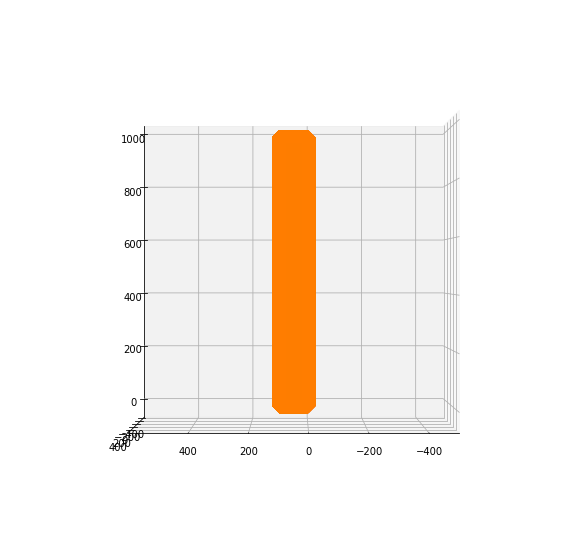

In [194]:
from pyntcloud import PyntCloud

pyCloud1 = PyntCloud.from_file("./pointcloud-experiment-notebooks/test.ply")

point_cloud_plot_1 = pyCloud1.plot()

point_cloud_plot_1

_After putting a lot of images in the sample dataset used for this function I was hoping to get a 3D point cloud resembling a brain, however the current plot does not look like what I was expecting._

_Maybe there are too many images and fewer need to be used._

_Because debugging this function in Google Colab is slow, I will leave this to be developed as as future improvement of this work._

_I ran a second experiment of the Pointcloud idea and I was right - less images is the correct way!_

_The notebook of the second experiment can be found in the `pointcloud-experiment-notebooks` direcotry and it is titled `Pointcloud experiment 1 notebook v2.ipynb`._

_I ran the experiment only on `9` images from the `mildly demented` class and the plot I got was much better, much more, like what I was expecting to get._

_See screenshots of the experiment from the previously mentioned notebook below:_

![Pointcloud-1.png](./resources/images/Pointcloud-1.png)

![Pointcloud-2.png](./resources/images/Pointcloud-2.png)

### Point clouds idea additional resources

_Here are some additional resources to try and help with the further development of this idea:_

- [How-to-create-a-3D-image-with-series-of-2D-Image](#How-to-create-a-3D-image-with-series-of-2D-Image) [[Reference]](#How-to-create-a-3D-image-with-series-of-2D-Image)

https://stackoverflow.com/questions/66699525/how-to-create-a-3d-image-with-series-of-2d-image


- [How to convert 2D DICOM slices to 3D image in Python](#How-to-convert-2D-DICOM-slices-to-3D-image-in-Python)

https://stackoverflow.com/questions/56723891/how-to-convert-2d-dicom-slices-to-3d-image-in-python


- [pydicom](#pydicom)

https://github.com/pydicom/pydicom


- [Numpy 2D image to 3D](#Numpy-2D-image-to-3D)

<https://stackoverflow.com/questions/67178372/numpy-2d-image-to-3d>


- [Numpy point cloud to image](#Numpy-point-cloud-to-image)

<https://stackoverflow.com/questions/60646028/numpy-point-cloud-to-image>


- [Convert XYZ point cloud to grayscale image](#Convert-XYZ-point-cloud-to-grayscale-image)

<https://stackoverflow.com/questions/53700089/convert-xyz-point-cloud-to-grayscale-image>


- [Generate point cloud from depth image](#Generate-point-cloud-from-depth-image)

<https://stackoverflow.com/questions/59590200/generate-point-cloud-from-depth-image>


- [Guide to real-time visualisation of massive 3D point clouds in Python](#Guide-to-real-time-visualisation-of-massive-3D-point-clouds-in-Python)

<https://towardsdatascience.com/guide-to-real-time-visualisation-of-massive-3d-point-clouds-in-python-ea6f00241ee0>


- [Coverting point cloud data (.ply) into a range image](#Coverting-point-cloud-data-(.ply)-into-a-range-image)

<https://stackoverflow.com/questions/65614088/coverting-point-cloud-data-ply-into-a-range-image>


- [Python - Display 3D Point Cloud [closed]](#Python---Display-3D-Point-Cloud-[closed])

<https://stackoverflow.com/questions/50965673/python-display-3d-point-cloud>


- [Python plyfile vs pymesh](#Python-plyfile-vs-pymesh)

<https://stackoverflow.com/questions/36920562/python-plyfile-vs-pymesh>

---

## 3D Photo Inpainting idea

_My next idea is instead of using point clouds, to use a technique, like the one described in this article [3D-Photo-Inpainting---Turn-Any-Picture-Into-3D-Photo-with-Deep-Learning-and-Python](https://curiousily.com/posts/3d-photo-inpainting-turn-any-picture-into-3d-photo-with-deep-learning-and-python/) [[Reference]](#3D-Photo-Inpainting---Turn-Any-Picture-Into-3D-Photo-with-Deep-Learning-and-Python) to try and get a 3D perspective of the medical images with the help of `estimated depth` images._

_The idea was once we get the `estimated depth` images to feed them to a CNN and train a new model, and see if these images improve it._

_Here a couple of images as examples from the article [3D-Photo-Inpainting---Turn-Any-Picture-Into-3D-Photo-with-Deep-Learning-and-Python](https://curiousily.com/posts/3d-photo-inpainting-turn-any-picture-into-3d-photo-with-deep-learning-and-python/) [[Reference]](#3D-Photo-Inpainting---Turn-Any-Picture-Into-3D-Photo-with-Deep-Learning-and-Python):_

- _Original image:_

![demo_inpainting.jpg](./resources/images/demo_inpainting.jpg)

[[Reference]](#3D-Photo-Inpainting---Turn-Any-Picture-Into-3D-Photo-with-Deep-Learning-and-Python)

- _Estimated depth image:_

![dog_depth.png](./resources/images/dog_depth.png)

[[Reference]](#3D-Photo-Inpainting---Turn-Any-Picture-Into-3D-Photo-with-Deep-Learning-and-Python)

---

## 3D Convolutional Neural Network idea

_My next idea from the [Abstract](#Abstract) section, is following my previous two ideas - once you have the 3D versions of the medical images or 3D point clouds, or estimated depth images from 3D picture impainting by converting a 2D image to a 3D one, feed those images to a 3D Convolutional Neural Network._

_Below is an example of such 3D CNN from this article [Step by Step Implementation: 3D Convolutional Neural Network in Keras](https://towardsdatascience.com/step-by-step-implementation-3d-convolutional-neural-network-in-keras-12efbdd7b130)._

[[Reference]](#Step-by-Step-Implementation:-3D-Convolutional-Neural-Network-in-Keras)

_The code below is just an example, its not meant to be ran as part of this notebook, its more like pseudo code, of what a potential 3D Convolutional Neural Network architecture could look like._

In [12]:
# import os
# # os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   #if like me you do not have a lot of memory in your GPU
# # os.environ["CUDA_VISIBLE_DEVICES"] = "" #then these two lines force keras to use your CPU
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
# import numpy as np
# import matplotlib.pyplot as plt
# import h5py

In [ ]:
# # Create the model
# a3Dmodel = Sequential()
# a3Dmodel.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(176, 176, 176, 3)))
# a3Dmodel.add(MaxPooling3D(pool_size=(2, 2, 2)))
# a3Dmodel.add(BatchNormalization(center=True, scale=True))
# a3Dmodel.add(Dropout(0.5))
# a3Dmodel.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
# a3Dmodel.add(MaxPooling3D(pool_size=(2, 2, 2)))
# a3Dmodel.add(BatchNormalization(center=True, scale=True))
# a3Dmodel.add(Dropout(0.5))
# a3Dmodel.add(Flatten())
# a3Dmodel.add(Dense(256, activation='relu'))
# a3Dmodel.add(Dense(128, activation='relu'))
# a3Dmodel.add(Dense(10, activation='softmax'))

# # Compile the model
# a3Dmodel.compile(loss='categorical_crossentropy',
#               optimizer=keras.optimizers.Adam(lr=0.001),
#               metrics=['accuracy'])
# a3Dmodel.summary()
# # Fit data to model
# a3Dmodel_history = model.fit(diy_train_ds,
#             batch_size=32,
#             epochs=10,
#             verbose=1,
#             validation_split=0.3)

---

## Further development

_Because of all of the Google Colab limitations, impediments, pain and frustration I was not able to implement all ideas mentioned in the [Abstract](#Abstract) section._

_However I think we have demonstrated the concepts we set out to demonstrate and have proven that the overall concept works. Therefore I think this article can be further developed in one or more of the following ways, implementing said ideas._


---

## Conclusion

_While carrying out the work and experiments in this notebook, we have achieved at least one of our main goals - to understand and demonstrate some Deep Learning (DL) basics, more specifically to understand Neural Networks (NNs) and how to improve them, so we can create models, train them, test them and extract predictions, classifications and information we might be interested in._

_We have demonstrated some of the following basic but key concepts of Deep Learning:_

- _Convolutional Neural Network_


- _Building a Neural Network architecture_


- _Compiling a model with optimizers and loss functions_


- _Training a model_


- _Evaluating a model_


- _Improving a model with Transfer Learning_


- _etc._

_Because of all of the Google Colab limitations, impediments, pain and frustration I was not able to implement all ideas mentioned in the [Abstract](#Abstract) section._ _Because of these I was not able to achieve the desired state of the art metric scores and demonstrate that the architectures and models are suitable for medical disease classifications, such as Alzheimer's disease in our case._

*Thus we can say that, using the scientific method, we have not rejected our [Null Hypothesis $(H_{0})$](#Null-hypothesis-$(H_{0})$) and we have not proved our [Alternative Hypothesis $(H_{1})$](#Alternative-hypothesis-$(H_{1})$) with the experiments carried out of training and then testing different Deep Learning algorithms, architectures and models, and seeing if they achieve state of the art accuracy and AUROC metrics which make them reliable for disease prediction and classification.*

_That said, there is definitely hope and potential in this project. Judging by the results achieve in this paper, MULTI-DISEASE DETECTION IN RETINAL IMAGING BASED ON ENSEMBLING HETEROGENEOUS DEEP LEARNING MODELS [[Reference]](#MULTI-DISEASE-DETECTION-IN-RETINAL-IMAGING-PDF), where they have achieved **"AUROC of 0.95 for the disease risk classification"** means that in a proper environment, with sufficient computing power we can achieve the same or better results._

_Furthermore in this notebook, [CNN-Alzheimer-MRI-images](#CNN-Alzheimer-MRI-images), it is stated - **"In this experiment, our model achieves very satisfactory accuracy levels, i.e., > 99%, in predicting the state of previously unseen MRI brain images."** [[Reference]](#CNN-Alzheimer-MRI-images), which is also very encouraging._

_Having said that further research, work, improvements and implementations of the ideas in this paper, and all referenced papers should be carried out._

---

## Appendix A<a id="AppendixA"></a>

### Glossary

- DL - Deep Learning
- NN - Neural Network
- CNN - Convolutional Neural Network
- EDA - exploratory data analysis

### Table of Contents

*In order to use a Table of Contents for this article, please use the `toc2` extension from `Nbextensions` for Jupyter Notebook. You can find instructions on how to install and use it in this <a href="https://stackoverflow.com/questions/21151450/how-can-i-add-a-table-of-contents-to-a-jupyter-jupyterlab-notebook">link</a>.*

---

## References <a id="ReferencesSection"></a>


### mri_image_classification_using_transfer_learning
<https://www.kaggle.com/youssefgdv/mri-image-classification-using-transfer-learning/notebook>

### Alzheimer's Disease Classification - InceptionV3
<https://www.kaggle.com/youssefgdv/alzheimer-s-disease-classification-inceptionv3/notebook>

### Alzheimer MRI Model + TensorFlow 2.3 Data Loading
<https://www.kaggle.com/amyjang/alzheimer-mri-model-tensorflow-2-3-data-loading/notebook>

### TensorFlow Pneumonia Classification on X-rays
<https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays>

### CNN Alzheimer MRI images
<https://www.kaggle.com/albertociacci/cnn-alzheimer-mri-images/notebook>

### Alzheimer's Dataset ( 4 class of Images)
<https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images>

### Alzheimer's Dataset ( 4 class of Images) - Header image
<https://storage.googleapis.com/kaggle-datasets-images/457093/861496/0e1367b46c9e96bdf3823ec7833b965d/dataset-cover.jpg?t=2019-12-26-19-14-30>

---

### The Alzheimer's Disease Prediction Of Longitudinal Evolution (TADPOLE) Challenge: Results after 1 Year Follow-up
<https://paperswithcode.com/paper/the-alzheimer-s-disease-prediction-of>

### The Alzheimer's Disease Prediction Of Longitudinal Evolution (TADPOLE) Challenge: Results after 1 Year Follow-up - arxiv.org
<https://arxiv.org/pdf/2002.03419v2.pdf>

### Preclinical Stage Alzheimer’s Disease Detection Using MRI Scans
<https://github.com/sanchezgrsa/Preclinical-Stage-Alzheimers-Disease-Detection>

### alzheimer's disease detection - paperswithcode.com
<https://paperswithcode.com/task/alzheimer-s-disease-detection>

---

### OASIS Brains project
<https://www.oasis-brains.org/>

---

### Deep Learning in Alzheimer's disease: Diagnostic Classification and Prognostic Prediction using Neuroimaging Data
<https://arxiv.org/abs/1905.00931>

### Automatic Assessment of Alzheimer's Disease Diagnosis Based on Deep Learning Techniques
<https://arxiv.org/abs/2105.08446>

### An explainable two-dimensional single model deep learning approach for Alzheimer's disease diagnosis and brain atrophy localization
<https://arxiv.org/abs/2107.13200>

### Convolutional Neural Networks for Classification of Alzheimer's Disease: Overview and Reproducible Evaluation
<https://arxiv.org/abs/1904.07773>

### Improving 3D convolutional neural network comprehensibility via interactive visualization of relevance maps: Evaluation in Alzheimer's disease
<https://arxiv.org/abs/2012.10294>

### Diagnosis of Alzheimer's Disease via Multi-modality 3D Convolutional Neural Network
<https://arxiv.org/abs/1902.09904>

### Detection of Alzheimers Disease from MRI using Convolutional Neural Networks, Exploring Transfer Learning And BellCNN
<https://arxiv.org/abs/1901.10231>

### Detecting Alzheimer's Disease Using Gated Convolutional Neural Network from Audio Data
<https://arxiv.org/abs/1803.11344>

### Deep Convolutional Neural Network based Classification of Alzheimer's Disease using MRI data
<https://arxiv.org/abs/2101.02876>

---

### TensorFlow Pneumonia Classification on X-rays
<https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays/notebook>

### A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way
<https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53>

### tf.keras.metrics.categorical_accuracy
<https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_accuracy>

### tf.keras.metrics.AUC
<https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC>

---
### MULTI-DISEASE DETECTION IN RETINAL IMAGING PDF
<https://arxiv.org/pdf/2103.14660v1.pdf>

### Multi-Disease Detection in Retinal Imaging - papers with code
<https://paperswithcode.com/paper/multi-disease-detection-in-retinal-imaging>

### Multi-Disease Detection in Retinal Imaging - GitHub
<https://github.com/frankkramer-lab/riadd.aucmedi>

### AUCMEDI - A Framework for Automated Classification of Medical Images
<https://pypi.org/project/aucmedi/>

### RETINAL FUNDUS MULTI-DISEASE IMAGE DATASET (RFMID)
<https://ieee-dataport.org/open-access/retinal-fundus-multi-disease-image-dataset-rfmid#files>

### RFMiD Train Dataset - kaggle
<https://www.kaggle.com/awsaf49/rfmid-train-dataset>

### Retinal Image Analysis for multi-Disease Detection Challenge website
<https://riadd.grand-challenge.org/>

### IEEE ISBI 2021 International Symposium on Biomedical Imaging April 13-16 2021
<https://biomedicalimaging.org/2021/>

---

### 3D Photo Inpainting - Turn Any Picture Into 3D Photo with Deep Learning and Python
<https://curiousily.com/posts/3d-photo-inpainting-turn-any-picture-into-3d-photo-with-deep-learning-and-python/>

### How to create a 3D image with series of 2D Image
<https://stackoverflow.com/questions/66699525/how-to-create-a-3d-image-with-series-of-2d-image>

### How to convert 2D DICOM slices to 3D image in Python
<https://stackoverflow.com/questions/56723891/how-to-convert-2d-dicom-slices-to-3d-image-in-python>

### pydicom
<https://github.com/pydicom/pydicom>

### Numpy 2D image to 3D
<https://stackoverflow.com/questions/67178372/numpy-2d-image-to-3d>

### Numpy point cloud to image
<https://stackoverflow.com/questions/60646028/numpy-point-cloud-to-image>

### Convert XYZ point cloud to grayscale image
<https://stackoverflow.com/questions/53700089/convert-xyz-point-cloud-to-grayscale-image>

### Generate point cloud from depth image
<https://stackoverflow.com/questions/59590200/generate-point-cloud-from-depth-image>

### Guide to real-time visualisation of massive 3D point clouds in Python
<https://towardsdatascience.com/guide-to-real-time-visualisation-of-massive-3d-point-clouds-in-python-ea6f00241ee0>

### Coverting point cloud data (.ply) into a range image
<https://stackoverflow.com/questions/65614088/coverting-point-cloud-data-ply-into-a-range-image>

### Python - Display 3D Point Cloud [closed]
<https://stackoverflow.com/questions/50965673/python-display-3d-point-cloud>

### Python plyfile vs pymesh
<https://stackoverflow.com/questions/36920562/python-plyfile-vs-pymesh>

---

### Step by Step Implementation: 3D Convolutional Neural Network in Keras
<https://towardsdatascience.com/step-by-step-implementation-3d-convolutional-neural-network-in-keras-12efbdd7b130>

---

### Tensorflow Data augmentation
<https://www.tensorflow.org/tutorials/images/data_augmentation>

---

### Deep Learning with Python
<https://www.manning.com/books/deep-learning-with-python>

### Alzheimer's disease - Wikipedia
<https://en.wikipedia.org/wiki/Alzheimer%27s_disease#/media/File:Alzheimer's_disease_brain_comparison.jpg>

### What to know about MRI scans
<https://www.medicalnewstoday.com/articles/146309>

---

### Google Colab
<https://colab.research.google.com/>

---

### Austin Powers - Live dangerously meme 1
<https://i.kym-cdn.com/photos/images/newsfeed/000/511/991/3a5.jpg>

---

---

---

---

In [ ]:
# A temporary hack, to keep the notebook from timing out. 
# Comment it out when not needed, otherwise it will cause an infinite loop.

while True:pass